Executive summary
The purpose of this exercise was to
1. Analyse the salary details and see if we can find a good model capable of imputing/predicting the salaries in the missing rows.
All the salaries were first classified into 7 different classes 
(742750.0, 1475000.0]     610
(1475000.0, 2200000.0]    256
(2200000.0, 2925000.0]    102
(2925000.0, 3650000.0]     35
(4375000.0, 5100000.0]     13
(3650000.0, 4375000.0]     12
(6550000.0, 7275000.0]      4
(7275000.0, 8000000.0]      3
(5825000.0, 6550000.0]      2
(5100000.0, 5825000.0]      1
Here the last 4 classes were combined to take care of the long tail of the salaries. Due to the severe class imbalance, the model was upscaled to ensure that all the classes have an adequate representation. After trying out multiple models, we finalized on an ensemble method of logistics and SVC (rbf) based model with soft voting criteria as it had a test accuracy of 76% with a standard deviation of 1.2%. We successfully imputed all the missing values to get the salaries for all the rows with missing salaries. The distribution of the final salaries is quite similar to that of the original salaries which acts as a sanity check for the predictions.
2. After the salary predictions the next step was to find out any trend in the titles and see if there was a way to predict the title based on the remaining parameters. 
After trying out multiple models including SVC, Decision tree, Random forest, Adaboost and ensemble, we reach the conclusion that the titles cannot be predicted in an accurate enough manner. So we decided to go with unsupervised classifications to see if we can extract meaning out of the data.
3. Unsupervised classification: After trying out multiple classes, we were able to find a good classification at 6 levels with KNN. The meaning of these classes and their associated cluster names were derived by performing the Tukey test.

Cluster 0:  
Cluster name: Townie
Identifiers: 
1. These are the jobs located in all the small cities
2. Most of the titles in this cluster are related to Developers and Engineers
3. Low experience requirement of 3 to 7 years with very low salary expectations of less than INR 14,75,000 (AUD 29500)
Skills: SQL, HTML and Java

Cluster 1:  
Cluster name: Fresher
Identifiers: 
1. With very low experience requirement, they are most likely to be fresh college graduates. 
2. Almost all the jobs in NCR are in this cluster with a high concentration in other major cities of Hyd, Pune, Mumbai, Bangalore and Chennai. 
3. Most of the titles for this cluster are Developers and Engineers. 
4. Lowest salary tier of less than INR 14,75,000 (AUD 29500)
Skills: SQL and generic software skills

Cluster 2:  
Cluster name: Leader
Identifiers: 
1. High job experience (with expectations of 6 to 10 years experience) 
2. Most of the job in Bangalore are in this cluster. 
3. They will almost never have the title of ’Analyst’
4. Most of the time the title is likely to have the keyword ‘Lead’, ‘Senior’ or ‘Engineer’
5. This cluster falls in the highest salary level typically in the range of upwards to INR 29,25,000 (60,000 AUD)
Skills: SQL, Python, Algorithms, Java

Cluster 3:  
Cluster name: Manager
Identifiers: 
Extremely high experience (with expectations of 8 to 12 years experience) 
They are highly likely to have a managerial role
Very high salaries typically in the range of upwards to INR 22,00,000 (AUD 44,000)
Skills: SQL, Project Management, Six Sigma, Python and Oracle

Cluster 4:  
Cluster name: Local Hotshot
Identifiers: 
Similar to Townie Cluster with respect to small town location
Likely to have much higher experience than Townies in the range of 5 to 10 years
Most likely to have titles like Architect, Consultant or even Lead with similar salary range of Fresher
Skills: SQL, HTML, Six Sigma, Python and Oracle

Cluster 5:  
Cluster name: Hyder
Identifiers: 
Limited to the city of Hyderabad
Average Salary and experience requirements
Most likely to not be in NCR
Most likely salary to be in the similar range to fresher
Skills: SQL, HTML, Java, Python, C and Oracle


In [21]:
#Importing from naukri.com which is one of the biggest job portals for Indian market
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup as bs
import requests
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select,WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.preprocessing import LabelEncoder
link='https://www.naukri.com/data-jobs'

In [22]:
##Scraping on 13th Dec 2017
##Dont run this code again unless you want to start from scratch; just move to the next block
# df=pd.DataFrame([])
# count=1
# driver = webdriver.Chrome(executable_path="./chromedriver")
# driver.get(link)
# sleep(1)
# select=driver.find_element_by_id("salary_dd")
# select.click()
# option = select.find_element_by_id("a10")
# sleep(1)
# option.click()
# driver.find_element_by_id("qsbFormBtn").click()
# while driver.find_elements_by_link_text('Next'):
#     company=[]
#     title=[]
#     experience=[]
#     location=[]
#     skills=[]
#     salary=[]
#     dates=[]
#     html=driver.page_source
#     soup=bs(html,'lxml')
#     for com in soup.findAll('span',{'itemprop':'hiringOrganization'}):
#         company.append(com.text.encode("utf-8"))
#     for tit in soup.findAll('li',{'itemprop':'title'}):
#         title.append(tit.text.encode("utf-8"))
#     for exp in soup.findAll('span',{'itemprop':'experienceRequirements'}):
#         experience.append(exp.text.encode("utf-8"))
#     for loc in soup.findAll('span',{'itemprop':'jobLocation'}):
#         location.append(loc.text.encode("utf-8"))
#     for sk in soup.findAll('span',{'itemprop':'skills'}):
#         skills.append(sk.text.encode("utf-8"))
#     for sal in soup.findAll('span',{'itemprop':'baseSalary'}):
#         salary.append(sal.text.encode("utf-8"))
#     for date in soup.findAll('span',{'class':'date'}):
#         dates.append(date.text.encode("utf-8")) 
#     driver.find_element_by_link_text('Next').click()
#     df1=pd.DataFrame([company,title,experience,location,skills,salary,dates],index=['Company','Title','Experience','Location','Skills','Salary','Dates'])
#     df=pd.concat([df,df1],axis=1)    
# df.T.reset_index()
# #last page is remaining. Lets add that page manually
# company=[]
# title=[]
# experience=[]
# location=[]
# skills=[]
# salary=[]
# dates=[]
# html=driver.page_source
# soup=bs(html,'lxml')
# for com in soup.findAll('span',{'itemprop':'hiringOrganization'}):
#     company.append(com.text.encode("utf-8"))
# for tit in soup.findAll('li',{'itemprop':'title'}):
#     title.append(tit.text.encode("utf-8"))
# for exp in soup.findAll('span',{'itemprop':'experienceRequirements'}):
#     experience.append(exp.text.encode("utf-8"))
# for loc in soup.findAll('span',{'itemprop':'jobLocation'}):
#     location.append(loc.text.encode("utf-8"))
# for sk in soup.findAll('span',{'itemprop':'skills'}):
#     skills.append(sk.text.encode("utf-8"))
# for sal in soup.findAll('span',{'itemprop':'baseSalary'}):
#     salary.append(sal.text.encode("utf-8"))
# for date in soup.findAll('span',{'class':'date'}):
#     dates.append(date.text.encode("utf-8")) 
# df1=pd.DataFrame([company,title,experience,location,skills,salary,dates],index=['Company','Title','Experience','Location','Skills','Salary','Dates'])
# df=pd.concat([df,df1],axis=1)
# df=df.T.reset_index(drop='index')
# df.to_csv("data.csv")

In [23]:
df=pd.read_csv('/Users/VoldyArroW/Desktop/data.csv',index_col=0)

In [24]:
df[df['Dates'].isnull()]

,Company,Title,Experience,Location,Skills,Salary,Dates
50,Anantha,Analytics Platform Developer - Big Data/hadoop...,5-10 yrs,Chennai,"Hive, Advanced Java, Mapreduce, NoSQL, Hadoop,...",Not disclosed,NaN


In [25]:
#For the first data point,due to its recency, there is no date given so it keeps the value as NaN which 
# is shifted to the end of the first iteration i.e. 50th row. We will shift all the values one down to correct this
for i in range(1,50):
    df.loc[51-i,'Dates']=df.loc[50-i-1,'Dates']

In [26]:
#Checking for null values again!
df[df['Dates'].isnull()]

,Company,Title,Experience,Location,Skills,Salary,Dates


In [27]:
#Our next job will be to filter the data
#Lets drop all the rows whose title contain UI
df=df.drop(df[df['Title'].str.contains('UI')].index)
#Our next job will be to filter the data
#Lets drop all the rows whose title contain UX
df=df.drop(df[df['Title'].str.contains('UX')].index)
#Our next job will be to filter the data
#Lets drop all the rows whose title contain Designer
df=df.drop(df[df['Title'].str.contains('Designer')].index)
#Our next job will be to filter the data
#Lets drop all the Sales roles as well 
df=df.drop(df[df['Title'].str.contains('Sale')].index)
#Our next job will be to filter the data
#Lets drop all the Marketing roles as well 
df=df.drop(df[df['Title'].str.contains('Market')].index)
#Our next job will be to filter the data
#Lets drop all the Teaching roles as well 
df=df.drop(df[df['Title'].str.contains('Teach')].index)
#A lot of companies put up the same job again and again. Lets delete all the duplicates
df.drop_duplicates(['Company','Title','Experience','Location','Skills'],inplace=True)
#Our next job will be to filter the data
#Lets drop all the Finance roles as well 
df=df.drop(df[df['Skills'].str.contains('finance')].index)
#Our next job will be to filter the data
#Lets drop all the HR roles as well 
df=df.drop(df[df['Skills'].str.contains('HR')].index)
df=df.drop(df[df['Skills'].str.contains('human')].index)
#Our next job will be to filter the data
#Lets drop all the SCM roles as well 
df=df.drop(df[df['Skills'].str.contains('Supply Chain')|df['Skills'].str.contains('Procurement')].index)
#Our next job will be to filter the data
#Lets drop all the Data Entry roles as well 
df=df.drop(df[df['Skills'].str.contains('Entry')].index)
#Our next job will be to filter the data
#Lets drop all the Executive roles as well 
df=df.drop(df[df['Title'].str.contains('Executive')].index)

In [28]:
#Now that the data set is a bit clean, lets pick jobs which have python, SQL, Spark or Hadoop mentioned in the skills
df_new=df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('python')]
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('sql')]])
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('spark')]])
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('hadoop')]])

In [29]:
#Lets also include jobs which mention machine learning, neural network,nlp or deep learning or artificial
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('machine')]])
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('deep')]])
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('nlp')]])
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('neural')]])
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('artificial')]])
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('algorithm')]])

In [30]:
#Checking out the new dataframe
df_new

,Company,Title,Experience,Location,Skills,Salary,Dates
0,Increff,Data Scientist,1-3 yrs,Bengaluru,"Python, Machine Learning, SQL, Spark, R, Selli...",Not disclosed,Few Hours Ago
16,Mphasis Limited,Big Data- Project Lead,7-10 yrs,Hyderabad,"Technical skills, Stores, Troubleshooting, Dat...",Not disclosed,1 day ago
20,Mphasis Limited,Big Data -project Lead,5-8 yrs,Bengaluru,"Technical skills, Stores, Troubleshooting, Dat...",Not disclosed,1 day ago
21,Mphasis Limited,Big Data- Module Lead,5-8 yrs,Chennai,"Technical skills, Stores, Troubleshooting, Dat...",Not disclosed,1 day ago
22,Mphasis Limited,Big Data Module Lead,5-8 yrs,Hyderabad,"Technical skills, Stores, Troubleshooting, Dat...",Not disclosed,1 day ago
32,HuQuo,Big Data Consultant - Python/r/java/hadoop/hive+,1-4 yrs,"Delhi NCR, Gurgaon","SQL, Hadoop, Java, C++, Python, Big Data, Stat...",Not disclosed,1 day ago
44,JoulestoWatts,Senior Data Engineer - Java / Scala / Python,5-10 yrs,Bengaluru,"Spark, NoSQL, SCALA, Java, Hadoop, Data Scienc...",Not disclosed,1 day ago
46,Mphasis Limited,Big Data - Module Lead,5-8 yrs,Mumbai,"Technical skills, Stores, Troubleshooting, Dat...",Not disclosed,1 day ago
50,Anantha,Analytics Platform Developer - Big Data/hadoop...,5-10 yrs,Chennai,"Hive, Advanced Java, Mapreduce, NoSQL, Hadoop,...",Not disclosed,1 day ago
57,Premium,Head - Data Sciences,12-15 yrs,Mumbai,"c, r, python, machine learning, sas, sql, java...",Not disclosed,1 day ago


In [31]:
#Its possible that some of the jobs might get repeated due to multiple skills being listed. Lets drop duplicates here
df_new=df_new.drop_duplicates()
#Lets check which elements were not considered in our final DataFrame
df[~df.isin(df_new)].dropna()

,Company,Title,Experience,Location,Skills,Salary,Dates
2,EYGBS (India) Private Limited,Manager - Data Sciences,9-14 yrs,Bengaluru,"Project Delivery, Team Management Skills, SCOP...",Not disclosed,Few Hours Ago
4,HuQuo,Senior Business Analyst / Assistant Manager - ...,3-5 yrs,Delhi NCR,"data quality, data profiling, oracle, trillium...",Not disclosed,Few Hours Ago
7,AERONUBE TECHNOLOGY PRIVATE LIMITED,Data Analyst | IT MNC | Bangalore,3-5 yrs,Bengaluru,"R Programming, Tableau, AWS Redshift",Not disclosed,1 day ago
9,Premium,Senior Data Analyst - BFSI Domain,7-12 yrs,Mumbai,"data analysis, data analytics, business analys...",Not disclosed,1 day ago
11,Talific Consulting Services Pvt. Ltd.,Am-data Analyst/business Analyst-no.1 -Car MNC...,3-5 yrs,Delhi(Jasola),"Regression Analysis, SAS, R, Data Analysis, Pr...","5,00,000 - 10,00,000 P.A.",1 day ago
12,CORPORATE ACCESS,Manager - Data Quality Profiling,6-9 yrs,Bengaluru,"Data Profiling, Data Quality, Data Analysis, D...",Not disclosed,1 day ago
13,XL India Business Services Pvt. Ltd.,Data Engineer,2-7 yrs,Wroclaw,"general insurance, data modeling, data managem...",Not disclosed,1 day ago
14,Markit India Services Private Limited,Sr Data Transformation Analyst I,5-8 yrs,Bengaluru,"Senior Analyst, Telecom, Automation, RF, Autom...",Not disclosed,1 day ago
17,Mphasis Limited,Data Engineering- Module Lead,5-8 yrs,Bengaluru,"Application development, Performance tuning, T...",Not disclosed,1 day ago
19,Mphasis Limited,Business Intelligence / Data Warehousing - Pro...,7-10 yrs,Bengaluru,"Business Intelligence, Data warehousing, Cogno...",Not disclosed,1 day ago


In [32]:
#Lets also include jobs which mention Data in their title
df_new=pd.concat([df_new,df[df['Title'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('data')]])
#Lets also include jobs which mention Regression or big data in skills or title
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('regression')]])
df_new=pd.concat([df_new,df[df['Skills'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('big data')]])
df_new=pd.concat([df_new,df[df['Title'].map(lambda x: x if type(x)!=str else x.lower()).str.contains('big data')]])
df_new=df_new.sort_index().drop_duplicates()

In [33]:
#I think we have all the relavant values in the df_new that we wanted
#Lets see how many columsn for the Salary have values in them
df_new[df_new['Salary']!='  Not disclosed '].shape[0]

1098

In [34]:
#Armed with 1096 salary values, lets clean up all the columns!
df_new['Company'].value_counts().head(20)

Premium                                     1624
Global Recruiters                            136
JPMorgan Chase                               132
Wipro Limited                                124
HuQuo                                         94
Mphasis Limited                               93
Accenture                                     92
Amazon India Software Dev Centre Pvt Ltd      88
Larsen & Toubro Infotech Limited              84
Squircle IT Consulting Services Pvt Ltd       81
Confidential                                  78
Elite Tech Recruiters                         70
Cisco Systems (India) Private Limited         67
HuQuo Consulting Pvt. Ltd.                    62
Pentagon Consultancy Services                 59
Oracle India Pvt. Ltd.                        56
Rinalytics Advisors Pvt. Ltd                  54
DM CONSULTING (INDIA) PVT LTD                 46
Accenture Solutions Pvt Ltd                   43
Technosoft Global Services Pvt Ltd            41
Name: Company, dtype

In [35]:
#Premium and Global Recruiters are terms used by recruitment agencies. Other than that the data looks clean.
#Lets focus on the next column- Title
df_new=df_new.reset_index()
df_new=df_new.drop('index',axis=1)

In [36]:
#Defining a function to clean the titles based on some key words
def titleclean(x):
    if 'lead' in x.lower() or 'senior' in x.lower():
        return 'Lead'
    elif 'manage' in x.lower():
        return 'Manager'
    elif 'scientist' in x.lower():
        return 'Scientist'
    elif 'developer' in x.lower():
        return 'Developer'
    elif 'engineer' in x.lower():
        return 'Engineer'
    elif 'analys' in x.lower():
        return 'Analyst'
    elif 'architect' in x.lower():
        return 'Architect'
    elif 'consult' in x.lower():
        return 'Consultant'
    else:
        return 'Generic'
    

In [37]:
#Lets check out the distribution of the titles now
df_new['Title_new']=df_new['Title'].map(titleclean)
df_new['Title_new'].value_counts()

Lead          2704
Developer     2166
Generic       1865
Engineer      1505
Manager        890
Architect      726
Scientist      469
Analyst        415
Consultant     275
Name: Title_new, dtype: int64

In [38]:
#Having cleaned the Titles, lets clean the next column- Experience
df_new['Experience'].unique()
#Lets split this into min and max years
def ExpCleaner_min(x):
    a=x.split(' ')
    b=a[0].split('-')
    return int(b[0])
def ExpCleaner_max(x):
    a=x.split(' ')
    b=a[0].split('-')
    return int(b[1])
df_new['Exp_min']=df_new['Experience'].map(ExpCleaner_min)
df_new['Exp_max']=df_new['Experience'].map(ExpCleaner_max)

In [39]:
#Having cleaned the Experience, lets clean the next column- Location
#Some of the jobs have multiple locations posted, we will consider for the sake of arguement that the employer is 
#looking for 1 in each location
def NCR(x):
    if 'Delhi' in str(x):
        return 1
    elif 'NCR' in str(x):
        return 1
    elif 'Gurgaon' in str(x):
        return 1
    elif 'Noida' in str(x):
        return 1
    else:
        return 0
def Hyd(x):
    if 'Hyd' in str(x):
        return 1
    else:
        return 0
def Pune(x):
    if 'Pune' in str(x):
        return 1
    else:
        return 0
def Mumbai(x):
    if 'Mumbai' in str(x):
        return 1
    else:
        return 0
def Bangalore(x):
    if 'Bengaluru' in str(x):
        return 1
    elif 'Bangalore' in str(x):
        return 1
    else:
        return 0
def Chennai(x):
    if 'Chennai' in str(x):
        return 1
    else:
        return 0
def Ahmedabad(x):
    if 'Ahmedabad' in str(x):
        return 1
    else:
        return 0
def Kolkata(x):
    if 'Kolkata' in str(x):
        return 1
    else:
        return 0
def Kochi(x):
    if 'Kochi' in str(x):
        return 1
    else:
        return 0
def Jaipur(x):
    if 'Jaipur' in str(x):
        return 1
    else:
        return 0
def Trivandrum(x):
    if 'Trivandrum' in str(x):
        return 1
    else:
        return 0
def Indore(x):
    if 'Indore' in str(x):
        return 1
    else:
        return 0
def Coimbatore(x):
    if 'Coimbatore' in str(x):
        return 1
    else:
        return 0
def OthersLoc(row):
    if row['NCR']==0:
        if row['Hyd']==0:
            if row['Pune']==0:
                if row['Mumbai']==0:
                    if row['Bangalore']==0:
                        if row['Chennai']==0:
                            if row['Ahmedabad']==0:
                                if row['Kolkata']==0:
                                    if row['Kochi']==0:
                                        if row['Jaipur']==0:
                                            if row['Trivandrum']==0:
                                                if row['Indore']==0:
                                                    if row['Coimbatore']==0:
                                                        return 1
    else:
        return 0
df_new['NCR']=df_new['Location'].map(NCR)
df_new['Hyd']=df_new['Location'].map(Hyd)
df_new['Pune']=df_new['Location'].map(Pune)
df_new['Mumbai']=df_new['Location'].map(Mumbai)
df_new['Bangalore']=df_new['Location'].map(Bangalore)
df_new['Chennai']=df_new['Location'].map(Chennai)
df_new['Ahmedabad']=df_new['Location'].map(Ahmedabad)
df_new['Kolkata']=df_new['Location'].map(Kolkata)
df_new['Kochi']=df_new['Location'].map(Kochi)
# df_new['Hyderabad']=df_new['Location'].map(Hyderabad)
df_new['Jaipur']=df_new['Location'].map(Jaipur)
df_new['Trivandrum']=df_new['Location'].map(Trivandrum)
df_new['Indore']=df_new['Location'].map(Indore)
df_new['Coimbatore']=df_new['Location'].map(Coimbatore)
df_new['OthersLoc']=df_new.apply(OthersLoc,axis=1)

In [40]:
#Filling the OtherLoc column as 0 for all the NA values
df_new['OthersLoc']=df_new['OthersLoc'].fillna(0)

In [41]:
#Moving on to the next column- Skills
df_new['Skills_list']=df_new['Skills'].str.split(',')
for i in range(df_new.shape[0]):
    df_new['Skills_list'][i][-1]=df_new['Skills_list'][i][-1].split('.')[0]

In [42]:
#Moving on to the next column- Salary
#Checking out the unique values here
df_new['Salary'].unique()

array(['  Not disclosed ',
       '    14,00,000 - 17,00,000 P.A. ** Solid Perks + Great Incen...  ',
       '    5,00,000 - 10,00,000 P.A.  ',
       '    10,00,000 - 20,00,000 P.A. 10 to 45L  ',
       '    5,00,000 - 15,00,000 P.A. Salary is not a concern for t...  ',
       '    10,00,000 - 20,00,000 P.A.  ',
       '    7,00,000 - 10,00,000 P.A.  ',
       '    9,50,000 - 14,00,000 P.A.  ',
       '    12,00,000 - 14,00,000 P.A.  ',
       '    15,00,000 - 25,00,000 P.A.  ',
       '    40,00,000 - 45,00,000 P.A.  ',
       '    27,50,000 - 32,50,000 P.A.  ',
       '    5,50,000 - 12,00,000 P.A.  ',
       '    15,00,000 - 30,00,000 P.A.  ',
       '    25,00,000 - 40,00,000 P.A.  ',
       '    15,00,000 - 18,00,000 P.A. ** Solid Perks + Great Incen...  ',
       '    11,00,000 - 16,00,000 P.A. ** Solid Perks + Great Incen...  ',
       '    15,00,000 - 20,00,000 P.A.  ',
       '    10,00,000 - 13,00,000 P.A.  ',
       '    8,50,000 - 10,00,000 P.A.  ',
       '    6,50,000 - 

In [43]:
#Lets put all the 'Not disclosed' salaries as NA
df_new.loc[:,'Salary'][df_new['Salary']=='  Not disclosed ']='NA'

/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
#Checking all the non NA values
df_new[~(df_new['Salary']=='NA')]['Salary'].unique()

array(['    14,00,000 - 17,00,000 P.A. ** Solid Perks + Great Incen...  ',
       '    5,00,000 - 10,00,000 P.A.  ',
       '    10,00,000 - 20,00,000 P.A. 10 to 45L  ',
       '    5,00,000 - 15,00,000 P.A. Salary is not a concern for t...  ',
       '    10,00,000 - 20,00,000 P.A.  ',
       '    7,00,000 - 10,00,000 P.A.  ',
       '    9,50,000 - 14,00,000 P.A.  ',
       '    12,00,000 - 14,00,000 P.A.  ',
       '    15,00,000 - 25,00,000 P.A.  ',
       '    40,00,000 - 45,00,000 P.A.  ',
       '    27,50,000 - 32,50,000 P.A.  ',
       '    5,50,000 - 12,00,000 P.A.  ',
       '    15,00,000 - 30,00,000 P.A.  ',
       '    25,00,000 - 40,00,000 P.A.  ',
       '    15,00,000 - 18,00,000 P.A. ** Solid Perks + Great Incen...  ',
       '    11,00,000 - 16,00,000 P.A. ** Solid Perks + Great Incen...  ',
       '    15,00,000 - 20,00,000 P.A.  ',
       '    10,00,000 - 13,00,000 P.A.  ',
       '    8,50,000 - 10,00,000 P.A.  ',
       '    6,50,000 - 12,00,000 P.A.  ',
       '

In [45]:
#Since these indicate readings for location Belgium
df_new=df_new.drop(df_new[df_new['Salary']=='    45,000 - 50,000 P.A.  '].index)
#Since these indicate readings for location Canada
df_new=df_new.drop(df_new[df_new['Salary']=='    35,000 - 45,000 P.A.  '].index)
# Work from home role which is likely to skew all the readings
df_new=df_new.drop(df_new[df_new['Salary']=='    1,00,000 P.A.  '].index)
#Australia and Canada roles
df_new=df_new.drop(df_new[df_new['Salary']=='    45,000 - 60,000 P.A.  '].index)
# Work from home role which is likely to skew all the readings
df_new=df_new.drop(df_new[df_new['Salary']=='    1,00,000 & above P.A.  '].index)
# Work from home role which is likely to skew all the readings
df_new=df_new.drop(df_new[df_new['Salary']=='    60,000 P.A.  '].index)
#Checking if there is any salary reading without '-' or NA
df_new[~((df_new['Salary'].str.contains('-')) | (df_new['Salary']=='NA'))]

,Company,Title,Experience,Location,Skills,Salary,Dates,Title_new,Exp_min,Exp_max,...,Chennai,Ahmedabad,Kolkata,Kochi,Jaipur,Trivandrum,Indore,Coimbatore,OthersLoc,Skills_list


In [46]:
df_new[df_new['Salary'].str.contains('Cr')]

,Company,Title,Experience,Location,Skills,Salary,Dates,Title_new,Exp_min,Exp_max,...,Chennai,Ahmedabad,Kolkata,Kochi,Jaipur,Trivandrum,Indore,Coimbatore,OthersLoc,Skills_list
240,Quess Corp Ltd.,Sap-master Data Governan - CMMi Level5 Company...,4-9 yrs,"Hyderabad, Bengaluru","SAP MDG, SAP Master Data Governance, SAP Webdy...","40,00,000 - 1 Cr & above P.A.",6 days ago,Generic,4,9,...,0,0,0,0,0,0,0,0,0.0,"[SAP MDG, SAP Master Data Governance, SAP We..."
260,Quess Corp Ltd.,Sap-master Data Governan - CMMi Level5 Company...,4-9 yrs,"Bengaluru, Delhi NCR","Demandware, Demand Ware","40,00,000 - 1 Cr & above P.A.",6 days ago,Generic,4,9,...,0,0,0,0,0,0,0,0,0.0,"[Demandware, Demand Ware]"
1342,ABC Consultants Pvt Ltd,Data Architect role with World's Largest Banki...,10-16 yrs,Bengaluru,"sql, spark, hadoop, scala, etl, tableau, busin...","40,00,000 - 1 Cr & above P.A.",20 days ago,Architect,10,16,...,0,0,0,0,0,0,0,0,0.0,"[sql, spark, hadoop, scala, etl, tableau,..."
2430,SUPERIOR TALENT INDIA PRIVATE LIMITED,Opportunity for Core java VP IC Role/tech Lead...,7-12 yrs,Bengaluru,"java, core java, algorithms, multithreading, m...","50,00,000 - 1 Cr & above P.A.",7 days ago,Lead,7,12,...,0,0,0,0,0,0,0,0,0.0,"[java, core java, algorithms, multithreadin..."
2446,ABC Consultants Pvt Ltd,"Solution Architect, Enterprise Architect",12-16 yrs,"Delhi NCR, Chennai, Kolkata","solution architecture, enterprise architect, l...","40,00,000 - 1 Cr & above P.A.",5 days ago,Architect,12,16,...,1,0,1,0,0,0,0,0,0.0,"[solution architecture, enterprise architect,..."
4610,Staffopedia Consulting LLP,Trading Infrastructure Developer,3-8 yrs,Bengaluru,"Data Structures, Algorithms, C++, Python, Linu...","50,00,000 - 1 Cr & above P.A.",19 days ago,Developer,3,8,...,0,0,0,0,0,0,0,0,0.0,"[Data Structures, Algorithms, C++, Python, ..."


In [47]:
#Cleaning the salary column
import re
def CleanSalary_min(x):
    if x=='NA':
        return 'NA'
    else:
        a=re.findall('\W*(.*?) P.A.',x)
        b=a[0].split('-')
        return int(b[0].split(',')[0])*100000
def CleanSalary_max(x):
    if x=='NA':
        return 'NA'
    else:
        a=re.findall('\W*(.*?) P.A.',x)
        b=a[0].split('-')
        if 'Cr' in b[1].split(',')[0]:
            return 10000000
        else:
            return int(b[1].split(',')[0])*100000
df_new['Salary_min']=df_new['Salary'].map(CleanSalary_min)
df_new['Salary_max']=df_new['Salary'].map(CleanSalary_max)


In [48]:
#Dropping all the old columns
df_new=df_new.drop(['Title','Experience','Skills','Salary'],axis=1)

In [49]:
#Cleaning the date column
df_new['Dates'].unique()

array(['Few Hours Ago', '1 day ago', '2 days ago', '8 days ago',
       '5 days ago', '3 days ago', '7 days ago', '6 days ago',
       '4 days ago', '26 days ago', '15 days ago', '44 days ago',
       '13 days ago', '12 days ago', '14 days ago', '9 days ago',
       '16 days ago', '21 days ago', '29 days ago', '28 days ago',
       '20 days ago', '22 days ago', '27 days ago', '33 days ago',
       '23 days ago', '30 days ago', '11 days ago', '51 days ago',
       '50 days ago', '56 days ago', '46 days ago', '48 days ago',
       '47 days ago', '57 days ago', '35 days ago', '41 days ago',
       '34 days ago', '43 days ago', '37 days ago', '61 days ago',
       '36 days ago', '40 days ago', '49 days ago', '54 days ago',
       '58 days ago', '42 days ago', '19 days ago', '18 days ago',
       '60 days ago', '135 days ago', '153 days ago', '99 days ago',
       '39 days ago', '100 days ago', '104 days ago', '133 days ago',
       '31 days ago', '55 days ago', '45 days ago', '32 days ago'

In [50]:
df_new=df_new.reset_index().drop('index',axis=1)

In [51]:
def dateclean(x):
    if x=='Few Hours Ago':
        return 0
    elif x=='1 day ago':
        return 1
    else:
        a=re.findall('(.*) days ago',x)
        return int(a[0])
df_new['Dates_new']=df_new['Dates'].map(dateclean)
# dateclean('21 days ago')

In [52]:
df_new[['Dates_new','Dates']]

,Dates_new,Dates
0,0,Few Hours Ago
1,0,Few Hours Ago
2,0,Few Hours Ago
3,0,Few Hours Ago
4,1,1 day ago
5,1,1 day ago
6,1,1 day ago
7,1,1 day ago
8,1,1 day ago
9,1,1 day ago


In [53]:
#Removing dates column
df_new.drop('Dates',axis=1,inplace=True)

In [54]:
df_new=pd.concat([df_new,pd.get_dummies(df_new['Title_new'],prefix='Title')],axis=1)

In [55]:
df_new.drop('Title_Generic',axis=1,inplace=True) #Taking Generic as the base in the Titles

In [56]:
#Scanning the Locations again to ensure that all the locations are India based to ensure consistency in salaries
df_new[:500][df_new['OthersLoc']==1][['Location']]

/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Location
12,Wroclaw
76,India
80,United Kingdom (U.K)
96,Anywherein India
135,United Kingdom (U.K)
136,India
157,Nagercoil
174,Singapore
176,Dubai/ UAE
213,Anywherein India


In [57]:
#Lets remove all the non-India based jobs to have a better benchmark on the salary numbers and requirements
df_new=df_new.drop([12,80,135,174,176,222,321,325,367,371,500,519,523,524,532,557,559,657,658,697,782,915,918,1107,1194,1225,\
                  1229,1364,1437,1481,1482,1522,8483,8482,8481,8480,8471,9737,10851,10900,8484,8468,8121,7290,7291,7309,\
                  7343,1527,1530,1564,1824,1847,1849,1866,1867,1882,1907,1995,2065,2118,2128,2138,2308,2485,2520,2608,\
                  2766,2777,2821,2870,2871,2945,2946,3155,3177,3190,3321,3432,3432,3453,3454,3463,3493,3579,3673,3757,\
                  3814,3841,3872,3950,4053,4404,4559,4575,4676,4828,4829,5136,5143,5160,5170,5177,5180,5190,5263,\
                  5303,5336,5338,5341,5383,5384,5433,5500,5523,5729,5873,5953,5954,6042,6335,6887,6886])

In [58]:
#Dropping the location column and reseting the index
df_new.drop('Location',axis=1,inplace=True)
df_new.reset_index().drop('index',axis=1,inplace=True)

In [59]:
#Separate out the rows with the salaries mentioned in them from those without
df_new_salary=df_new[df_new["Salary_min"]!='NA']
df_new_nosalary=df_new[df_new["Salary_min"]=='NA']

In [60]:
df_new_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 2 to 11003
Data columns (total 30 columns):
Company             1038 non-null object
Title_new           1038 non-null object
Exp_min             1038 non-null int64
Exp_max             1038 non-null int64
NCR                 1038 non-null int64
Hyd                 1038 non-null int64
Pune                1038 non-null int64
Mumbai              1038 non-null int64
Bangalore           1038 non-null int64
Chennai             1038 non-null int64
Ahmedabad           1038 non-null int64
Kolkata             1038 non-null int64
Kochi               1038 non-null int64
Jaipur              1038 non-null int64
Trivandrum          1038 non-null int64
Indore              1038 non-null int64
Coimbatore          1038 non-null int64
OthersLoc           1038 non-null float64
Skills_list         1038 non-null object
Salary_min          1038 non-null object
Salary_max          1038 non-null object
Dates_new           1038 non-null int64
Title

In [61]:
df_new_salary['Salary_min']=df_new_salary['Salary_min'].map(int)
df_new_salary['Salary_max']=df_new_salary['Salary_max'].map(int)

/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [63]:
df_new_salary['Salary_avg']=(df_new_salary['Salary_min']+df_new_salary['Salary_max'])/2
df_new_salary['Exp_avg']=(df_new_salary['Exp_min']+df_new_salary['Exp_max'])/2
df_new['Exp_avg']=(df_new['Exp_min']+df_new['Exp_max'])/2

/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [64]:
df_new_salary['Salary_avg']

2        1550000.0
10        750000.0
34       1500000.0
48       1000000.0
51       1500000.0
60        850000.0
61       1150000.0
66       1500000.0
70       1300000.0
74        750000.0
75       2000000.0
83       2950000.0
84        850000.0
87       2250000.0
91       3250000.0
92        850000.0
95       1500000.0
99       1650000.0
101      1350000.0
102      1350000.0
103      2250000.0
105      1750000.0
107      1750000.0
109      1150000.0
110       900000.0
140      1750000.0
143       900000.0
146      1300000.0
154      3500000.0
157      1100000.0
           ...    
10820    2500000.0
10823    3750000.0
10824    3750000.0
10838    2750000.0
10839    1500000.0
10840    8000000.0
10845    1750000.0
10849    1400000.0
10865    1600000.0
10871    4250000.0
10872    3250000.0
10875    6500000.0
10876    1400000.0
10883    1000000.0
10886     750000.0
10891    1400000.0
10897    1350000.0
10898    1350000.0
10899     750000.0
10902    1350000.0
10922    1300000.0
10945    140

In [65]:
#Lets treat this like a classification problem instead of a regression problem and try to predict the bins
df_new_salary['Salary_avg_bins']=pd.cut(df_new_salary['Salary_avg'],bins=10)
# print df_new_salary['Salary_avg_bins']
print df_new_salary['Salary_avg_bins'].value_counts()

/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(742750.0, 1475000.0]     610
(1475000.0, 2200000.0]    256
(2200000.0, 2925000.0]    102
(2925000.0, 3650000.0]     35
(4375000.0, 5100000.0]     13
(3650000.0, 4375000.0]     12
(6550000.0, 7275000.0]      4
(7275000.0, 8000000.0]      3
(5825000.0, 6550000.0]      2
(5100000.0, 5825000.0]      1
Name: Salary_avg_bins, dtype: int64


In [66]:
#lets represent each of the bin with just one number using label encoder

LE=LabelEncoder()
df_new_salary['Salary_avg_bins']=LE.fit_transform(df_new_salary['Salary_avg_bins'])
print df_new_salary['Salary_avg_bins'].value_counts()

0    610
1    256
2    102
3     35
5     13
4     12
8      4
9      3
7      2
6      1
Name: Salary_avg_bins, dtype: int64


/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [67]:
#Lets combine the last 4 bins into one long tail bin
def combinecuts(x):
    if x==6 or x==7 or x==8 or x==9:
        return 6
    else:
        return x
df_new_salary['Salary_avg_bins']=df_new_salary['Salary_avg_bins'].map(combinecuts)
df_new_salary['Salary_avg_bins'].value_counts()

/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


0    610
1    256
2    102
3     35
5     13
4     12
6     10
Name: Salary_avg_bins, dtype: int64

In [68]:
#Due to uneven values, lets upscale the values of the lower bins
from sklearn.utils import resample
df_new_0=df_new_salary[df_new_salary['Salary_avg_bins']==0]
df_new_1=df_new_salary[df_new_salary['Salary_avg_bins']==1]
df_new_2=df_new_salary[df_new_salary['Salary_avg_bins']==2]
df_new_3=df_new_salary[df_new_salary['Salary_avg_bins']==3]
df_new_4=df_new_salary[df_new_salary['Salary_avg_bins']==4]
df_new_5=df_new_salary[df_new_salary['Salary_avg_bins']==5]
df_new_6=df_new_salary[df_new_salary['Salary_avg_bins']==6]
df_minority_upsampled1 = resample(df_new_1, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_new_0.shape[0],    # to match majority class
                                 random_state=6) # reproducible results
df_minority_upsampled2 = resample(df_new_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_new_0.shape[0],    # to match majority class
                                 random_state=6) # reproducible results
df_minority_upsampled3 = resample(df_new_3, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_new_0.shape[0],    # to match majority class
                                 random_state=6) # reproducible results
df_minority_upsampled4 = resample(df_new_4, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_new_0.shape[0],    # to match majority class
                                 random_state=6) # reproducible results
df_minority_upsampled5 = resample(df_new_5, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_new_0.shape[0],    # to match majority class
                                 random_state=6) # reproducible results
df_minority_upsampled6 = resample(df_new_6, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_new_0.shape[0],    # to match majority class
                                 random_state=6) # reproducible results

df_upsampled = pd.concat([df_new_0, df_minority_upsampled1,df_minority_upsampled2,df_minority_upsampled3,\
                          df_minority_upsampled4,df_minority_upsampled5,df_minority_upsampled6])

In [69]:
X=df_upsampled.drop(['Company','Title_new','Skills_list','Salary_avg','Salary_min','Salary_max','Salary_avg_bins'],axis=1)
Y=df_upsampled['Salary_avg_bins']

In [70]:
train_X,test_X,train_Y,test_Y=train_test_split(X,Y)

In [71]:
# params={'C':np.logspace(-3,0,5),'gamma':np.logspace(-3,0,5),'kernel':['rbf','sigmoid']}
logreg=LogisticRegressionCV(verbose=True)
ss=StandardScaler()
train_Xs=ss.fit_transform(train_X)
logreg.fit(train_Xs,train_Y)
print cross_val_score(logreg,ss.transform(test_X),test_Y).mean()
print cross_val_score(logreg,ss.transform(test_X),test_Y).std()

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.9s finished
/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.7s finished


0.503621762049


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.9s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.4s finished


0.0237801934271


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.4s finished


In [72]:
# #With 49% model accuracy we are doing OK. Lets try to see what kind of result we can get with SVC
# svc=SVC(probability=True)
# params={'C':np.logspace(-3,0,5),'gamma':np.logspace(-3,0,5),'kernel':['rbf','sigmoid']}
# svc_g=GridSearchCV(svc,params,cv=5,n_jobs=-1)
# svc_g.fit(train_Xs,train_Y)
# svc=svc_g.best_estimator_
# print cross_val_score(svc,ss.transform(test_X),test_Y).mean()
# print cross_val_score(svc,ss.transform(test_X),test_Y).std()

In [73]:
# f=open('svc_project4','wb')
# pickle.dump(svc,f)
# f.close()

f=open('svc_project4','rb')
svc=pickle.load(f)
f.close()

In [74]:
# print svc_g.best_params_
# print svc_g.best_score_

In [75]:
#Lets give ensembling a shot here.
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier([('logreg',logreg),('svc',svc)],voting='soft')
vc.fit(train_Xs,train_Y)
print cross_val_score(vc,ss.transform(test_X),test_Y).mean()
print cross_val_score(vc,ss.transform(test_X),test_Y).std()

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.5s finished


0.758447231495


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.4s finished
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    1.5s finished


0.00436098052496


In [76]:
# df_new.drop('Predicted_Salary_inverse',axis=1,inplace=True)

In [77]:
#This looks like a pretty consistent model with a standard deviation of 1.3%  
#Lets use this ensembled model to predicted the values for all the jobs without the Salaries
X=df_new.drop(['Company','Title_new','Skills_list','Salary_min','Salary_max'],axis=1)
df_new['Predicted_Salary']=vc.predict(ss.transform(X))
# df_new.info()
# X.shape
# df_new_salary.drop(['Company','Title_new','Skills_list','Salary_avg','Salary_min','Salary_max','Salary_avg_bins'],axis=1).shape

In [78]:
df_new['Predicted_Salary'].value_counts()

0    6804
1    1942
2    1228
3     470
6     171
4     171
5     101
Name: Predicted_Salary, dtype: int64

In [79]:
#This looks pretty consistent with out earlier salary values!
#Lets do a reverse transform to understand the salary bins
df_new['Predicted_Salary_inverse']=df_new['Predicted_Salary'].map(LE.inverse_transform)

In [80]:
#EDA
df_new.columns

Index([u'Company', u'Title_new', u'Exp_min', u'Exp_max', u'NCR', u'Hyd',
       u'Pune', u'Mumbai', u'Bangalore', u'Chennai', u'Ahmedabad', u'Kolkata',
       u'Kochi', u'Jaipur', u'Trivandrum', u'Indore', u'Coimbatore',
       u'OthersLoc', u'Skills_list', u'Salary_min', u'Salary_max',
       u'Dates_new', u'Title_Analyst', u'Title_Architect', u'Title_Consultant',
       u'Title_Developer', u'Title_Engineer', u'Title_Lead', u'Title_Manager',
       u'Title_Scientist', u'Exp_avg', u'Predicted_Salary',
       u'Predicted_Salary_inverse'],
      dtype='object')

In [81]:
df_new.count()

Company                     10887
Title_new                   10887
Exp_min                     10887
Exp_max                     10887
NCR                         10887
Hyd                         10887
Pune                        10887
Mumbai                      10887
Bangalore                   10887
Chennai                     10887
Ahmedabad                   10887
Kolkata                     10887
Kochi                       10887
Jaipur                      10887
Trivandrum                  10887
Indore                      10887
Coimbatore                  10887
OthersLoc                   10887
Skills_list                 10887
Salary_min                  10887
Salary_max                  10887
Dates_new                   10887
Title_Analyst               10887
Title_Architect             10887
Title_Consultant            10887
Title_Developer             10887
Title_Engineer              10887
Title_Lead                  10887
Title_Manager               10887
Title_Scientis

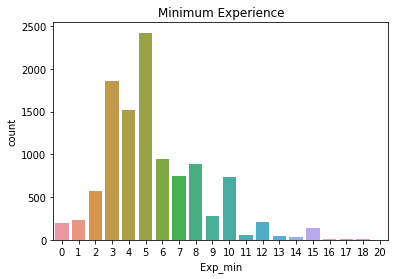

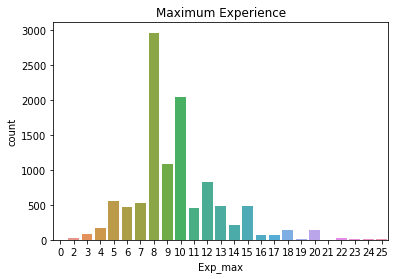

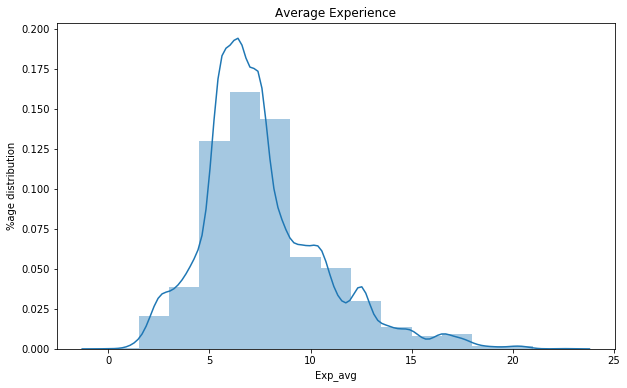

In [84]:
from scipy.stats import norm
import seaborn as sns
sns.countplot(df_new['Exp_min']).set_title('Minimum Experience')
plt.show()
sns.countplot(df_new['Exp_max']).set_title('Maximum Experience')
plt.show()
plt.figure(figsize=(10,6))
sns.distplot(df_new['Exp_avg'],kde=True,bins=15).set_title('Average Experience')
plt.ylabel('%age distribution')
plt.show()

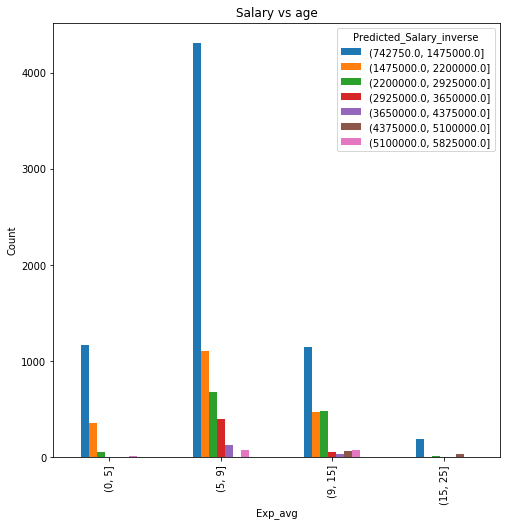

In [85]:

bins=[0, 5,9,15,25]
x = df_new.groupby(pd.cut(df_new['Exp_avg'], bins=bins))['Predicted_Salary_inverse'].value_counts()

x.unstack().plot.bar(figsize=(8,8))
plt.title('Salary vs age')
plt.ylabel('Count')
plt.show()

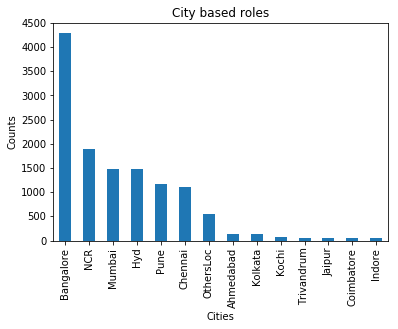

In [86]:
#Cities based jobs
df_new[['NCR','Hyd','Pune','Mumbai','Bangalore','Chennai','Ahmedabad','Kolkata','Kochi','Jaipur','Trivandrum','Indore','Coimbatore','OthersLoc']].sum().sort_values(ascending=False).plot.bar()
plt.xlabel('Cities')
plt.ylabel('Counts')
plt.title('City based roles')
plt.show()

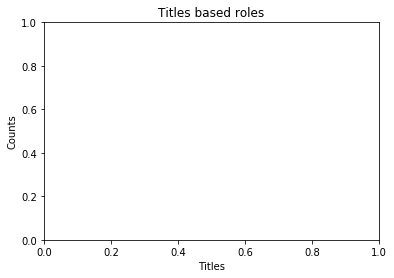

In [87]:
#Title based jobs
x=df_new[[c for c in df_new.columns if 'Title' in c]].drop('Title_new',axis=1).sum().sort_values(ascending=False)
plt.xlabel('Titles')
plt.ylabel('Counts')
plt.title('Titles based roles')
plt.show()

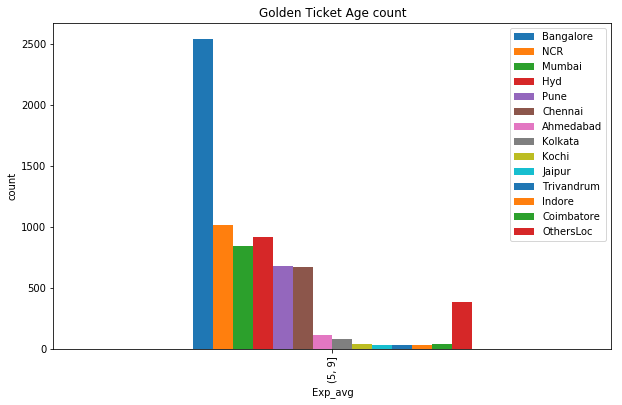

In [88]:
#City vs Age
x=df_new.groupby(pd.cut(df_new['Exp_avg'], bins=[5,9]))[['Bangalore','NCR','Mumbai','Hyd','Pune','Chennai','Ahmedabad','Kolkata','Kochi','Jaipur','Trivandrum','Indore','Coimbatore','OthersLoc']].sum()
x.plot.bar(figsize=(10,6))
plt.ylabel('count')
plt.title('Golden Ticket Age count')
plt.show()

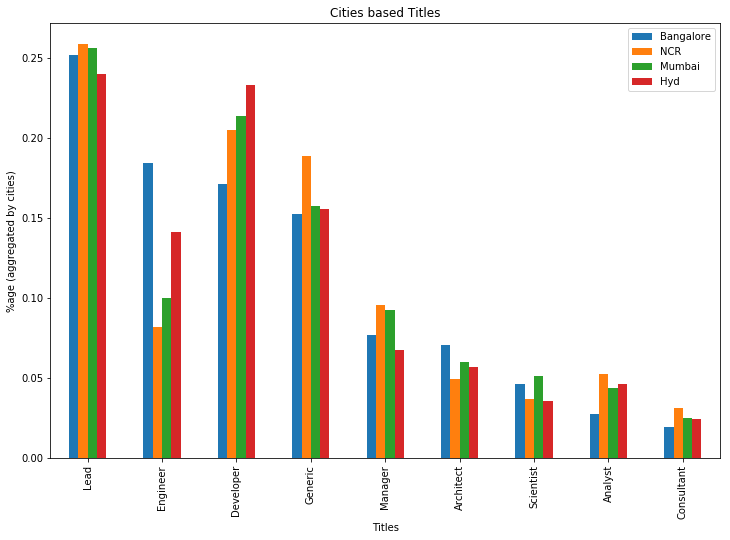

In [89]:
#Title vs city
x=df_new.groupby('Title_new')[['Bangalore','NCR','Mumbai','Hyd','Pune','Chennai','Ahmedabad','Kolkata','Kochi','Jaipur','Trivandrum','Indore','Coimbatore','OthersLoc']].sum()/df_new[['Bangalore','NCR','Mumbai','Hyd','Pune','Chennai','Ahmedabad','Kolkata','Kochi','Jaipur','Trivandrum','Indore','Coimbatore','OthersLoc']].sum()
x.sort_values('Bangalore',ascending=False).iloc[:,:4].plot.bar(figsize=(12,8))
plt.xlabel('Titles')
plt.ylabel('%age (aggregated by cities)')
plt.title('Cities based Titles')
plt.show()

Exp_min
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0126  -0.3033  0.278  False 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  1.6392   1.2889  1.9894  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0]  1.0284   0.4896  1.5671  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]   1.04    0.1653  1.9146  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  5.1976   4.0652  6.3299  True 
(742750.0, 1475000.0]  (5100000.0, 5825000.0]  1.2739   0.3992  2.1485  True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  1.6518    1.24   2.0637  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  1.041    0.4603  1.6217  True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  1.0526   0.1515  1.9537  True 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  5.2102   

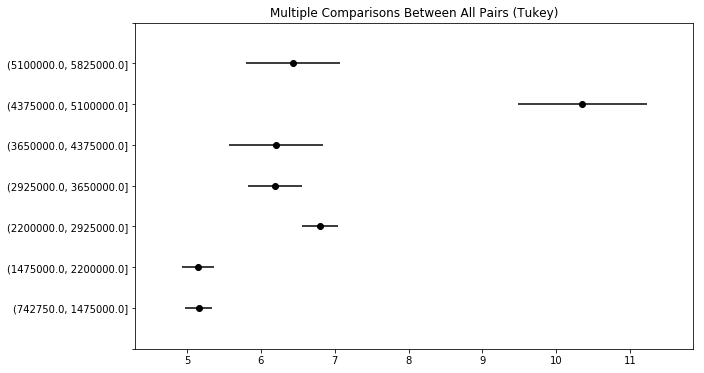

Exp_max
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  0.082   -0.2457  0.4097 False 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  1.8742   1.4793  2.2692  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0]  0.6438   0.0363  1.2513  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]  1.7097   0.7235  2.696   True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  6.6602   5.3834  7.9371  True 
(742750.0, 1475000.0]  (5100000.0, 5825000.0]  2.2828   1.2966  3.2691  True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  1.7922   1.3278  2.2566  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  0.5617  -0.0931  1.2166 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  1.6277   0.6116  2.6438  True 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  6.5782   

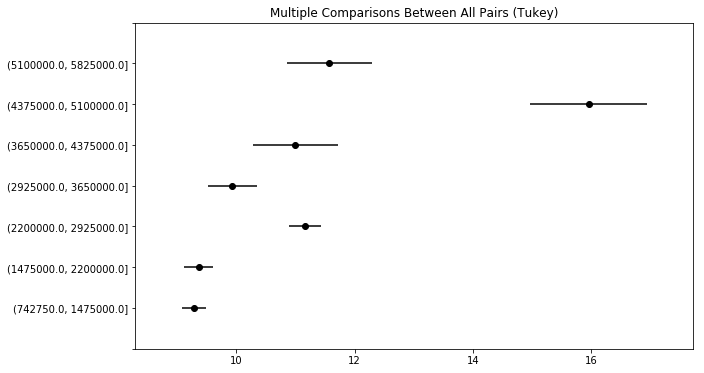

NCR
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  0.0483   0.009   0.0876  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0727   -0.12  -0.0253  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0983  -0.1712 -0.0255  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.1483  -0.2666 -0.0301  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.1735  -0.3266 -0.0204  True 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0782  -0.1964  0.0401 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  -0.121  -0.1767 -0.0653  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.1466  -0.2251 -0.0681  True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -0.1966  -0.3185 -0.0748  True 
(1475000.0, 2200000.0] (4375000.0, 5100000.0] -0.2218  -0.37

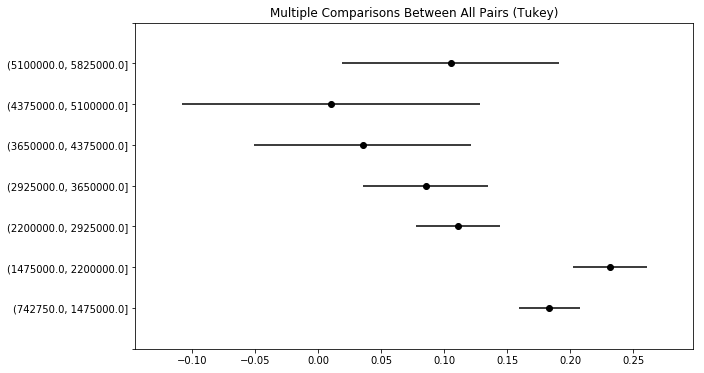

Hyd
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0568  -0.0923 -0.0213  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0099  -0.0526  0.0329 False 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.1067  -0.1725 -0.0409  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.1439  -0.2507 -0.0372  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0863  -0.2246  0.0519 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0972   -0.204  0.0096 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  0.0469  -0.0034  0.0972 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0499  -0.1208  0.021  False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -0.0872  -0.1972  0.0228 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0] -0.0296  -0.17

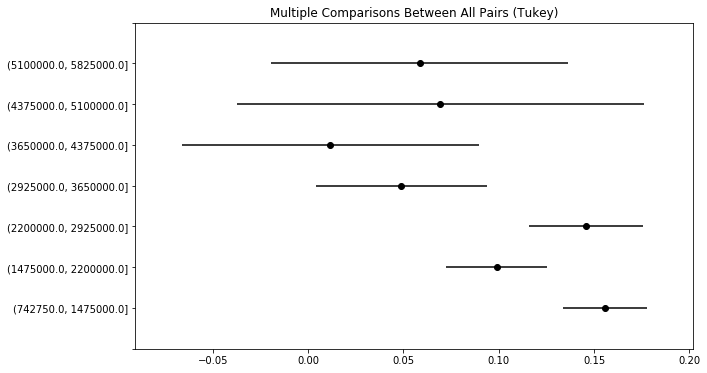

Pune
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.1113   -0.143 -0.0796  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  -0.123  -0.1612 -0.0848  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0]  -0.084  -0.1427 -0.0252  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.1499  -0.2453 -0.0545  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0905   -0.214  0.033  False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.1499  -0.2453 -0.0545  True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.0117  -0.0567  0.0332 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  0.0273   -0.036  0.0907 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -0.0386  -0.1369  0.0597 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  0.0208   -0.

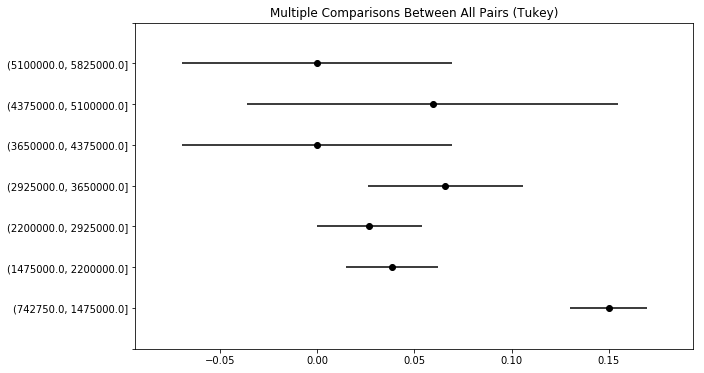

Mumbai
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  0.0003  -0.0351  0.0358 False 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.1106  -0.1534 -0.0679  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0903   -0.156 -0.0246  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.1562  -0.2629 -0.0495  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  0.1606   0.0225  0.2987  True 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.1562  -0.2629 -0.0495  True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.1109  -0.1612 -0.0607  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0906  -0.1614 -0.0197  True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -0.1565  -0.2665 -0.0466  True 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  0.1603   0

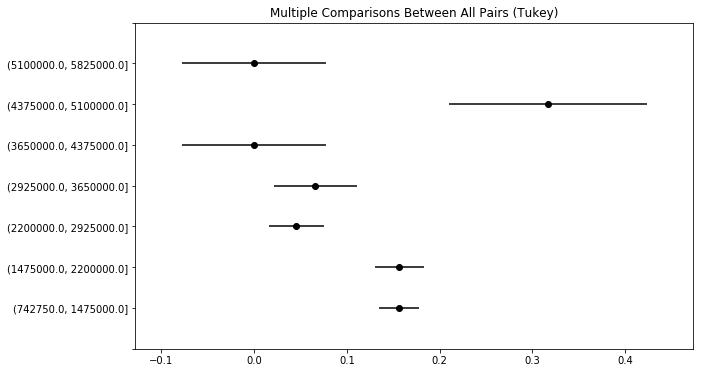

Bangalore
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  0.2704   0.2248  0.316   True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  0.4464   0.3914  0.5014  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0]  0.657    0.5724  0.7415  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]  0.6422   0.5049  0.7794  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  0.4027   0.225   0.5804  True 
(742750.0, 1475000.0]  (5100000.0, 5825000.0]  0.7357   0.5985  0.873   True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  0.176    0.1113  0.2406  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  0.3865   0.2954  0.4777  True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  0.3717   0.2303  0.5131  True 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  0.1322 

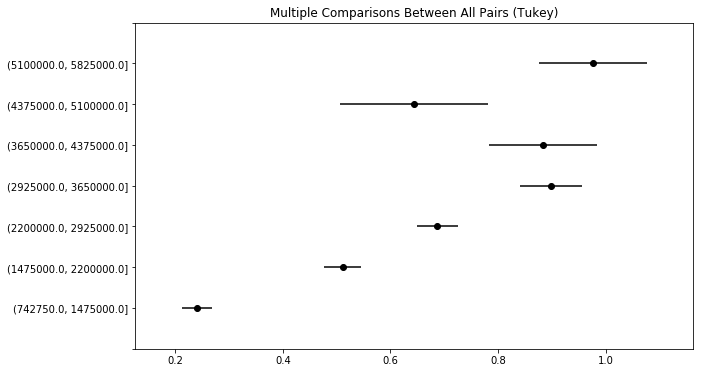

Chennai
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0394  -0.0706 -0.0083  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.1095   -0.147  -0.072  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.1035  -0.1613 -0.0458  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0764  -0.1702  0.0173 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.1191  -0.2405  0.0022 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.1115  -0.2052 -0.0178  True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.0701  -0.1142 -0.0259  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0641  -0.1263 -0.0018  True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  -0.037  -0.1335  0.0596 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0] -0.0797  -

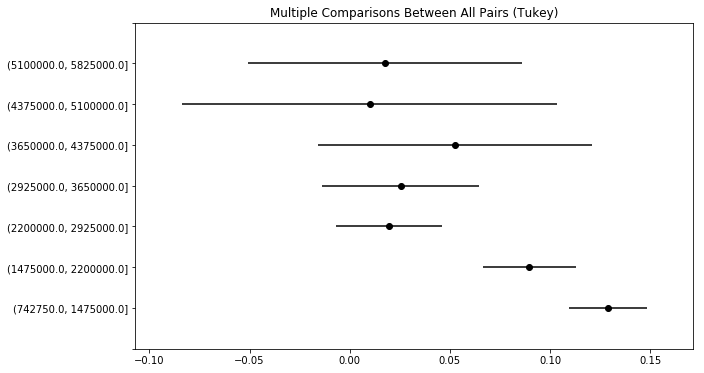

Ahmedabad
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0174  -0.0292 -0.0056  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  -0.02   -0.0342 -0.0058  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0]  -0.02   -0.0419  0.0019 False 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]  -0.02   -0.0555  0.0155 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0101  -0.0561  0.0359 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0]  -0.02   -0.0555  0.0155 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.0026  -0.0193  0.0141 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0026  -0.0261  0.021  False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -0.0026  -0.0392  0.034  False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  0.0073 

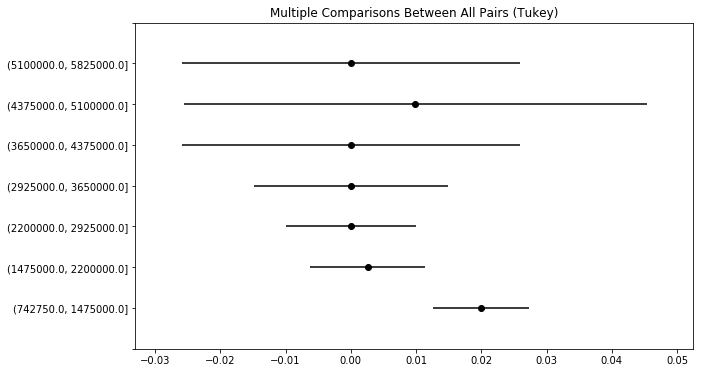

Kolkata
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0115  -0.0229 -0.0002  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0172  -0.0309 -0.0035  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0172  -0.0382  0.0038 False 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0113  -0.0455  0.0228 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0073  -0.0515  0.0369 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0113  -0.0455  0.0228 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.0057  -0.0217  0.0104 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0057  -0.0283  0.017  False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  0.0002   -0.035  0.0354 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  0.0042  -

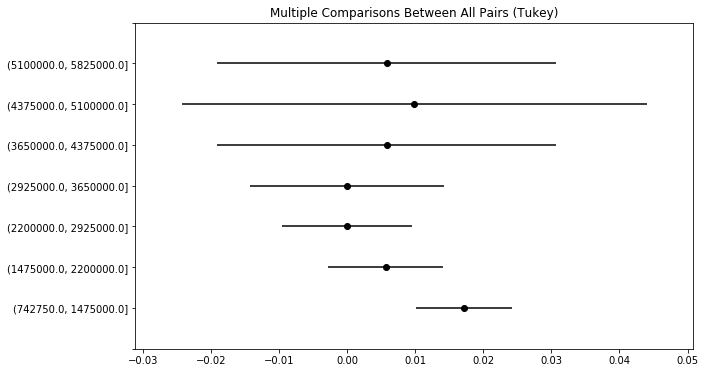

Kochi
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0118  -0.0207 -0.0028  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0109  -0.0217 -0.0002  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0118  -0.0283  0.0048 False 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0118  -0.0387  0.0152 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0118  -0.0466  0.0231 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0118  -0.0387  0.0152 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  0.0008  -0.0119  0.0135 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]   0.0    -0.0179  0.0179 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]   0.0    -0.0277  0.0277 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]   0.0    -0.

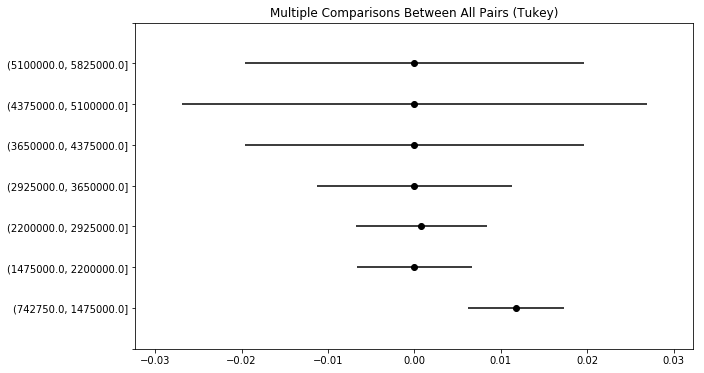

Jaipur
             Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower  upper  reject
----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0066  -0.0135 0.0003 False 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0066  -0.0149 0.0017 False 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0024  -0.0152 0.0104 False 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0066  -0.0274 0.0142 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  0.0033  -0.0236 0.0302 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0066  -0.0274 0.0142 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]   0.0    -0.0098 0.0098 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  0.0043  -0.0095 0.018  False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]   0.0    -0.0214 0.0214 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  0.0099  -0.0175 0.0373

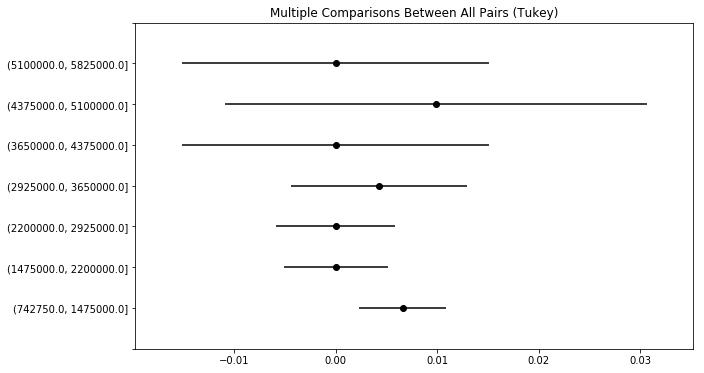

Trivandrum
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0076  -0.0148 -0.0005  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0076  -0.0163  0.001  False 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0076   -0.021  0.0057 False 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0076  -0.0293  0.014  False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0076  -0.0356  0.0203 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0076  -0.0293  0.014  False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]   0.0    -0.0102  0.0102 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]   0.0    -0.0143  0.0143 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]   0.0    -0.0223  0.0223 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]   0.0  

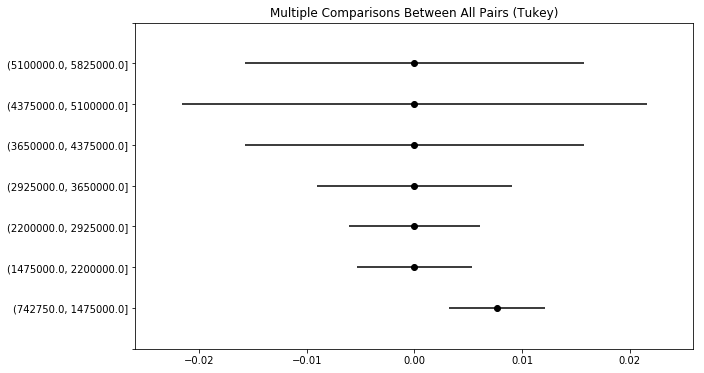

Indore
             Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower  upper  reject
----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0065  -0.0131 0.0001 False 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0065  -0.0144 0.0015 False 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0065  -0.0187 0.0058 False 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0065  -0.0264 0.0134 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0065  -0.0322 0.0193 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0065  -0.0264 0.0134 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]   0.0    -0.0094 0.0094 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]   0.0    -0.0132 0.0132 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]   0.0    -0.0205 0.0205 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]   0.0    -0.0262 0.0262

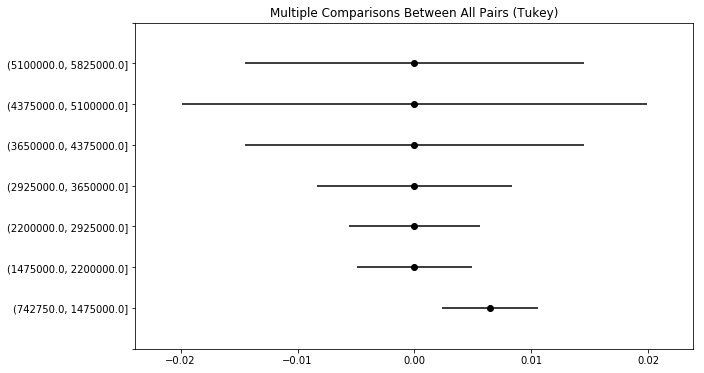

Coimbatore
             Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower  upper  reject
----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0053   -0.012 0.0014 False 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0063  -0.0144 0.0017 False 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0063  -0.0187 0.0061 False 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0063  -0.0264 0.0138 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0063  -0.0324 0.0197 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0063  -0.0264 0.0138 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  -0.001  -0.0105 0.0084 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  -0.001  -0.0144 0.0123 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  -0.001  -0.0218 0.0197 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  -0.001  -0.0276 0.

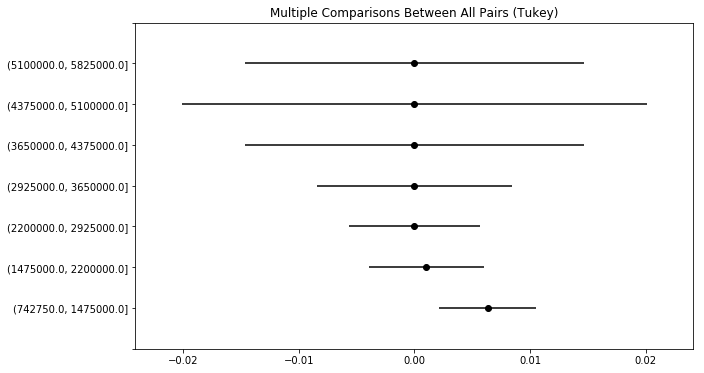

OthersLoc
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0536   -0.076 -0.0311  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0718  -0.0988 -0.0447  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0726  -0.1142  -0.031  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]  -0.02   -0.0875  0.0476 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0726   -0.16   0.0148 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0726  -0.1401 -0.0051  True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.0182   -0.05   0.0136 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0191  -0.0639  0.0258 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  0.0336   -0.036  0.1032 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0] -0.0191 

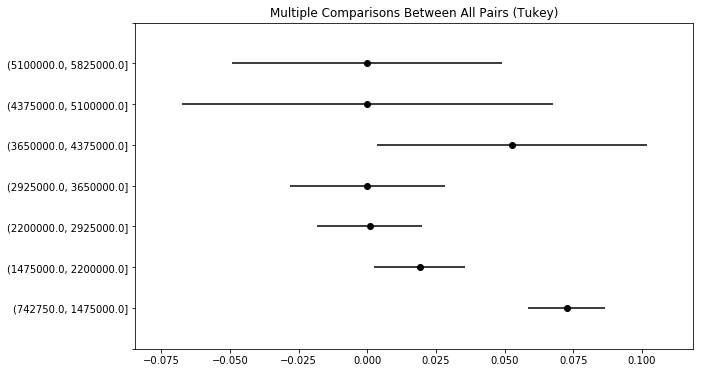

Dates_new
               Multiple Comparison of Means - Tukey HSD,FWER=0.00              
        group1                 group2         meandiff  lower    upper   reject
-------------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.9673  -3.5085   1.5739  False 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -1.2984  -4.3609   1.7641  False 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -8.1165  -12.8274 -3.4057   True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -20.7675 -28.4153 -13.1197  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  5.3566  -4.5445  15.2578  False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -17.0307 -24.6785 -9.3828   True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.3311  -3.9323   3.2702  False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -7.1492  -12.2269 -2.0716   True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -19.8002 -27.6792 -11.9212  True 
(1475000.0, 2200000.0] (437500

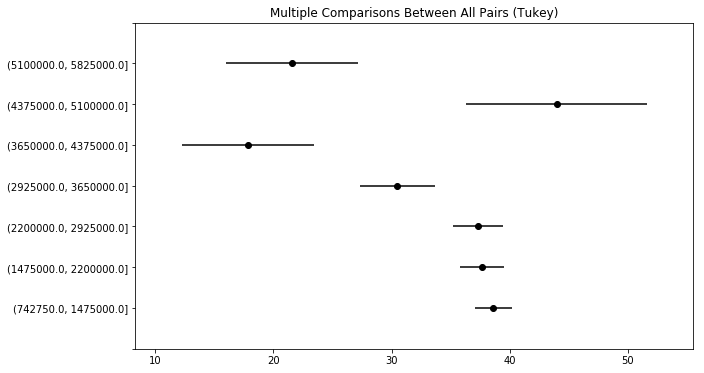

Title_Analyst
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0584   -0.078 -0.0388  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  -0.054  -0.0777 -0.0304  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0589  -0.0953 -0.0226  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0589  -0.1179   0.0   False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0589  -0.1353  0.0174 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0589  -0.1179   0.0   False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  0.0044  -0.0234  0.0321 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0005  -0.0397  0.0386 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -0.0005  -0.0613  0.0602 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0] -0.0

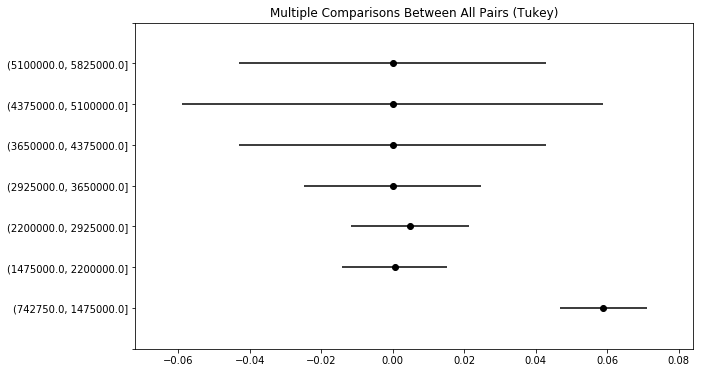

Title_Architect
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0092  -0.0345  0.0161 False 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  0.0507   0.0202  0.0812  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0]  0.0444  -0.0025  0.0913 False 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]  0.0401  -0.0361  0.1162 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  0.4911   0.3925  0.5897  True 
(742750.0, 1475000.0]  (5100000.0, 5825000.0]  0.0693  -0.0069  0.1455 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]   0.06    0.0241  0.0958  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  0.0536   0.003   0.1042  True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  0.0493  -0.0292  0.1277 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  0

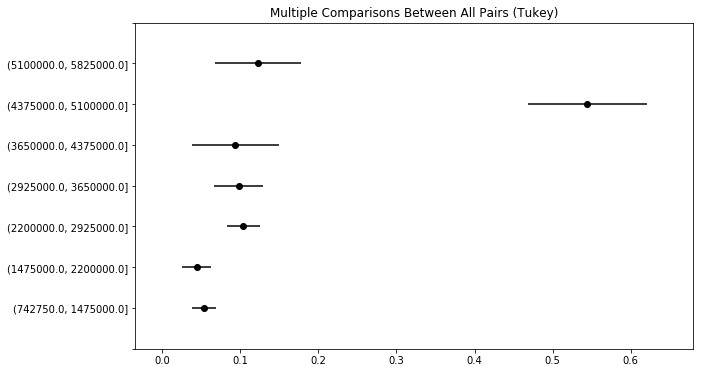

Title_Consultant
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.0297  -0.0457 -0.0137  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0369  -0.0562 -0.0176  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0369  -0.0665 -0.0073  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.0369   -0.085  0.0112 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0369  -0.0992  0.0254 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0369   -0.085  0.0112 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.0072  -0.0299  0.0154 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0072  -0.0391  0.0247 False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -0.0072  -0.0568  0.0423 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0] -

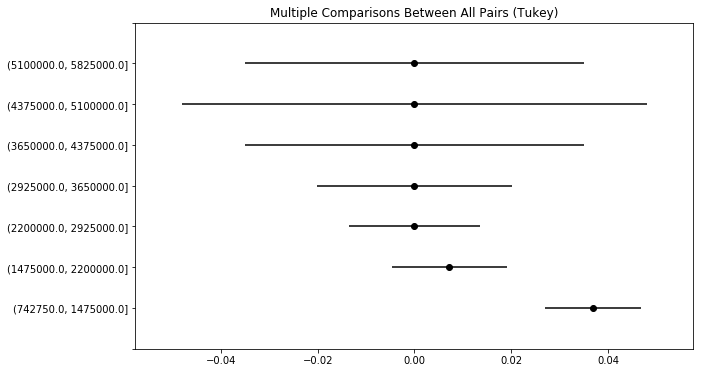

Title_Developer
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0] -0.1674  -0.2072 -0.1275  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.2524  -0.3004 -0.2043  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.2719  -0.3458  -0.198  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.2719  -0.3919 -0.1519  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  -0.262  -0.4174 -0.1066  True 
(742750.0, 1475000.0]  (5100000.0, 5825000.0]  0.0614  -0.0586  0.1814 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  -0.085  -0.1415 -0.0285  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.1045  -0.1842 -0.0248  True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -0.1045  -0.2282  0.0191 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0] -0

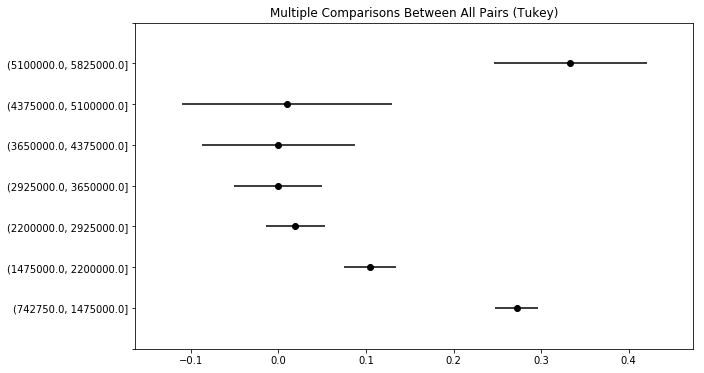

Title_Engineer
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  0.1082   0.0733  0.143   True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  0.0939   0.0519  0.136   True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0]  0.2546    0.19   0.3192  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]  0.4187   0.3138  0.5236  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0901  -0.2259  0.0457 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0]  0.0152  -0.0897  0.1201 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.0142  -0.0636  0.0352 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  0.1464   0.0768  0.2161  True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  0.3105   0.2024  0.4186  True 
(1475000.0, 2200000.0] (4375000.0, 5100000.0] -0.

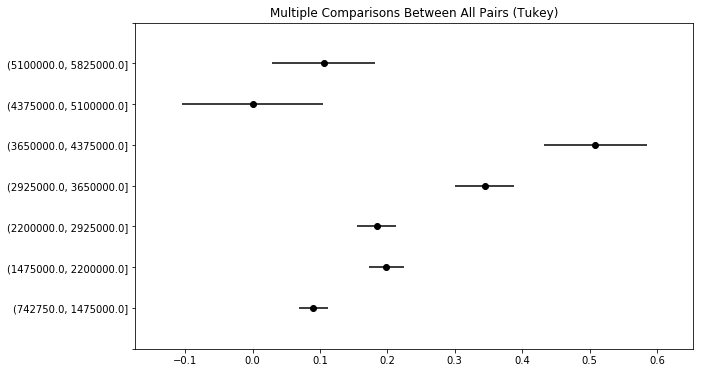

Title_Lead
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  0.1547   0.1108  0.1986  True 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  0.1582   0.1053  0.2111  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0]  0.3326   0.2512  0.4139  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0] -0.1829   -0.315 -0.0507  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0204  -0.1914  0.1507 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0]  0.1505   0.0183  0.2826  True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  0.0034  -0.0588  0.0657 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  0.1778   0.0901  0.2655  True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0] -0.3376  -0.4737 -0.2015  True 
(1475000.0, 2200000.0] (4375000.0, 5100000.0] -0.1751

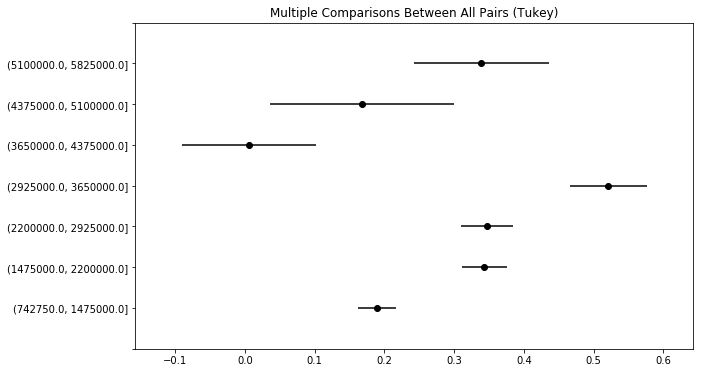

Title_Manager
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  0.0026  -0.0256  0.0307 False 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]   0.1     0.0661  0.134   True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0]  -0.062  -0.1142 -0.0097  True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]  0.0444  -0.0404  0.1291 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0] -0.0429  -0.1527  0.0669 False 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0726  -0.1574  0.0122 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  0.0975   0.0575  0.1374  True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0645  -0.1208 -0.0083  True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  0.0418  -0.0456  0.1291 False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0] -0.0

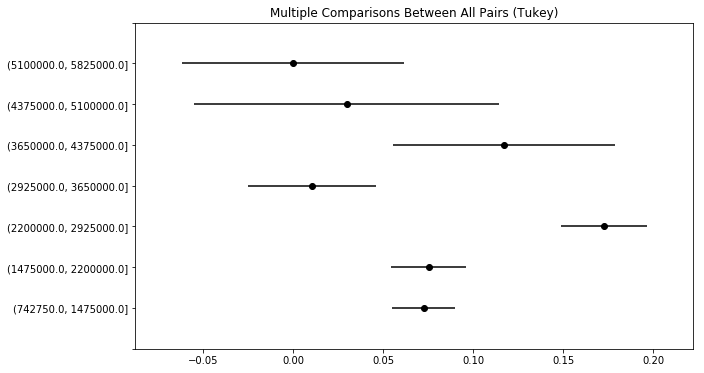

Title_Scientist
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  0.0081  -0.0128  0.0291 False 
(742750.0, 1475000.0]  (2200000.0, 2925000.0] -0.0208   -0.046  0.0045 False 
(742750.0, 1475000.0]  (2925000.0, 3650000.0] -0.0337  -0.0726  0.0051 False 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]  0.0141   -0.049  0.0772 False 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  0.0942   0.0125  0.1759  True 
(742750.0, 1475000.0]  (5100000.0, 5825000.0] -0.0444  -0.1075  0.0187 False 
(1475000.0, 2200000.0] (2200000.0, 2925000.0] -0.0289  -0.0586  0.0008 False 
(1475000.0, 2200000.0] (2925000.0, 3650000.0] -0.0419  -0.0838   0.0   False 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  0.006   -0.0591  0.071  False 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  0

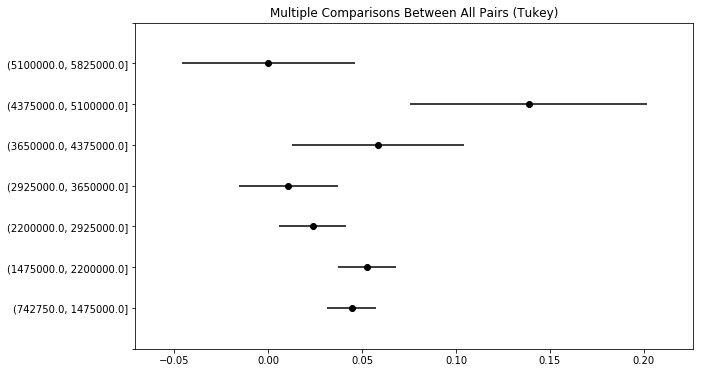

Exp_avg
              Multiple Comparison of Means - Tukey HSD,FWER=0.00             
        group1                 group2         meandiff  lower   upper  reject
-----------------------------------------------------------------------------
(742750.0, 1475000.0]  (1475000.0, 2200000.0]  0.0347  -0.2673  0.3367 False 
(742750.0, 1475000.0]  (2200000.0, 2925000.0]  1.7567   1.3927  2.1207  True 
(742750.0, 1475000.0]  (2925000.0, 3650000.0]  0.8361   0.2762  1.396   True 
(742750.0, 1475000.0]  (3650000.0, 4375000.0]  1.3748   0.4659  2.2838  True 
(742750.0, 1475000.0]  (4375000.0, 5100000.0]  5.9289   4.7521  7.1056  True 
(742750.0, 1475000.0]  (5100000.0, 5825000.0]  1.7784   0.8694  2.6873  True 
(1475000.0, 2200000.0] (2200000.0, 2925000.0]  1.722    1.294    2.15   True 
(1475000.0, 2200000.0] (2925000.0, 3650000.0]  0.8014   0.1979  1.4048  True 
(1475000.0, 2200000.0] (3650000.0, 4375000.0]  1.3401   0.4037  2.2766  True 
(1475000.0, 2200000.0] (4375000.0, 5100000.0]  5.8942   

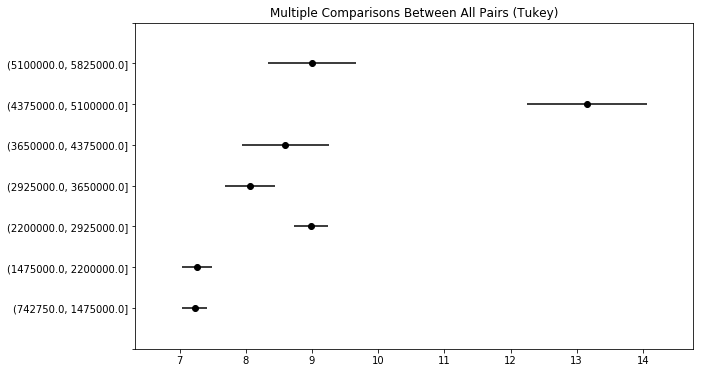

In [90]:
#For the sake of understanding, it should be mentioned that the last cut of (5100000.0, 5825000.0] includes
# the long tail of (5825000.0, 8000000.0]
import statsmodels.stats.multicomp as multi
Check=df_new.drop(['Company','Salary_min','Salary_max','Title_new','Skills_list','Predicted_Salary_inverse','Predicted_Salary'],axis=1)
for col in Check.columns:
    mc1=multi.MultiComparison(df_new[col],df_new['Predicted_Salary_inverse'])
    res1=mc1.tukeyhsd(alpha=0.001)
    print col
    print res1.summary()
    res1.plot_simultaneous()
    plt.show()

In [91]:
#Job Classifications- top 3 keywords associated with the job
#We will try to classify the titles and predict them for the generic roles.
df_roles=df_new[df_new['Title_new']!='Generic']
df_roles_pred=df_new[df_new['Title_new']=='Generic']

In [92]:
LE1=LabelEncoder()
df_roles.drop(['Company','Title_Architect','Title_Consultant','Title_Developer','Title_Engineer',\
               'Title_Lead','Title_Manager','Title_Scientist','Title_Analyst','Salary_min'\
              ,'Salary_max','Predicted_Salary_inverse'],axis=1,inplace=True)
df_roles_pred.drop(['Company','Title_Architect','Title_Consultant','Title_Developer','Title_Engineer',\
               'Title_Lead','Title_Manager','Title_Scientist','Title_Analyst','Salary_min'\
              ,'Salary_max','Predicted_Salary_inverse'],axis=1,inplace=True)
df_roles['Title']=LE1.fit_transform(df_roles['Title_new'])

/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/VoldyArroW/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [93]:
# df_roles.drop('Title_new',axis=1,inplace=True)
weight=pd.DataFrame(1/df_roles['Title'].value_counts()*1000).to_dict()['Title']
df_roles.info()
train_X,test_X,train_Y,test_Y=train_test_split(df_roles.drop(['Title','Skills_list','Title_new'],axis=1),df_roles['Title'])
#since SVC worked really well for us earlier, lets start from there now
ss1=StandardScaler()
#Uncomment below
svc1=SVC(probability=True,class_weight=weight)
# params={'C':np.logspace(-3,0,5),'gamma':np.logspace(-3,0,5),'kernel':['rbf','sigmoid','linear']}
# svc_g1=GridSearchCV(svc1,params,cv=5,n_jobs=-1)
# svc_g1.fit(ss1.fit_transform(train_X),train_Y)
# svc1=svc_g1.best_estimator_
# print cross_val_score(svc1,ss1.transform(test_X),test_Y).mean()
# print cross_val_score(svc1,ss1.transform(test_X),test_Y).std()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9055 entries, 0 to 11007
Data columns (total 22 columns):
Title_new           9055 non-null object
Exp_min             9055 non-null int64
Exp_max             9055 non-null int64
NCR                 9055 non-null int64
Hyd                 9055 non-null int64
Pune                9055 non-null int64
Mumbai              9055 non-null int64
Bangalore           9055 non-null int64
Chennai             9055 non-null int64
Ahmedabad           9055 non-null int64
Kolkata             9055 non-null int64
Kochi               9055 non-null int64
Jaipur              9055 non-null int64
Trivandrum          9055 non-null int64
Indore              9055 non-null int64
Coimbatore          9055 non-null int64
OthersLoc           9055 non-null float64
Skills_list         9055 non-null object
Dates_new           9055 non-null int64
Exp_avg             9055 non-null float64
Predicted_Salary    9055 non-null int64
Title               9055 non-null int64
dtypes

In [94]:
# f=open('svc1_project4','wb')
# pickle.dump(svc1,f)
# f.close()

In [95]:
f=open('svc1_project4','rb')
svc1=pickle.load(f)
f.close()

In [96]:
#Establishing baseline
df_roles['Title'].value_counts()/df_roles['Title'].shape[0]
#The accuracy is lower than our baseline so lets move on and try some other model here.

5    0.297957
3    0.235781
4    0.164660
6    0.097184
1    0.079072
7    0.051022
0    0.045058
2    0.029266
Name: Title, dtype: float64

In [97]:
#Lets try the Decision Tree Classification to see if we can get a better accuracy score
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(class_weight=weight)
params={'max_depth':range(1,25,1)}
svc_g2=GridSearchCV(dc,params,cv=5,n_jobs=-1)
svc_g2.fit(train_X,train_Y)
dc=svc_g2.best_estimator_
print cross_val_score(dc,test_X,test_Y).mean()
print cross_val_score(dc,test_X,test_Y).std()

0.400178705936
0.00564255629972


In [98]:
#This is still not good enough!
#Lets try the RandomForest approach
from sklearn.ensemble import RandomForestClassifier
rdc=RandomForestClassifier(class_weight=weight)
params={'max_depth':range(1,25,1)}
svc_g3=GridSearchCV(rdc,params,cv=5,n_jobs=-1)
svc_g3.fit(train_X,train_Y)
rdc=svc_g3.best_estimator_
print cross_val_score(rdc,test_X,test_Y).mean()
print cross_val_score(rdc,test_X,test_Y).std()

0.440399336987
0.00896616899017


In [100]:
#Again this model is not as good as expected
#Lets try for a simpler logistic regression approach
logreg1=LogisticRegressionCV(Cs=1000,class_weight=weight)


logreg1.fit(ss1.fit_transform(train_X),train_Y)

print cross_val_score(logreg1,ss1.transform(test_X),test_Y).mean()
print cross_val_score(logreg1,ss1.transform(test_X),test_Y).std()

0.248150113526
0.0375599170342


In [101]:
#All the models so far are performing no better than random guessing
#Lets try AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(ss1.fit_transform(train_X),train_Y)
print cross_val_score(ABC,ss1.transform(test_X),test_Y).mean()
print cross_val_score(ABC,ss1.transform(test_X),test_Y).std()

0.297292677652
0.0317371905764


In [102]:
#Trying adaboost on Normalised data!
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
pip=make_pipeline(Normalizer,AdaBoostClassifier)
ada=AdaBoostClassifier().fit(Normalizer().fit_transform(train_X),train_Y)

In [103]:
print cross_val_score(ada,Normalizer().fit_transform(test_X),test_Y).mean()

0.296426005687


In [138]:
df_roles=df_new
df_roles['Title']=LE1.fit_transform(df_roles['Title_new'])

In [139]:
df_roles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10887 entries, 0 to 11007
Data columns (total 24 columns):
Title_new           10887 non-null object
Exp_min             10887 non-null int64
Exp_max             10887 non-null int64
NCR                 10887 non-null int64
Hyd                 10887 non-null int64
Pune                10887 non-null int64
Mumbai              10887 non-null int64
Bangalore           10887 non-null int64
Chennai             10887 non-null int64
Ahmedabad           10887 non-null int64
Kolkata             10887 non-null int64
Kochi               10887 non-null int64
Jaipur              10887 non-null int64
Trivandrum          10887 non-null int64
Indore              10887 non-null int64
Coimbatore          10887 non-null int64
OthersLoc           10887 non-null float64
Skills_list         10887 non-null object
Dates_new           10887 non-null int64
Exp_avg             10887 non-null float64
Predicted_Salary    10887 non-null int64
Title               1088

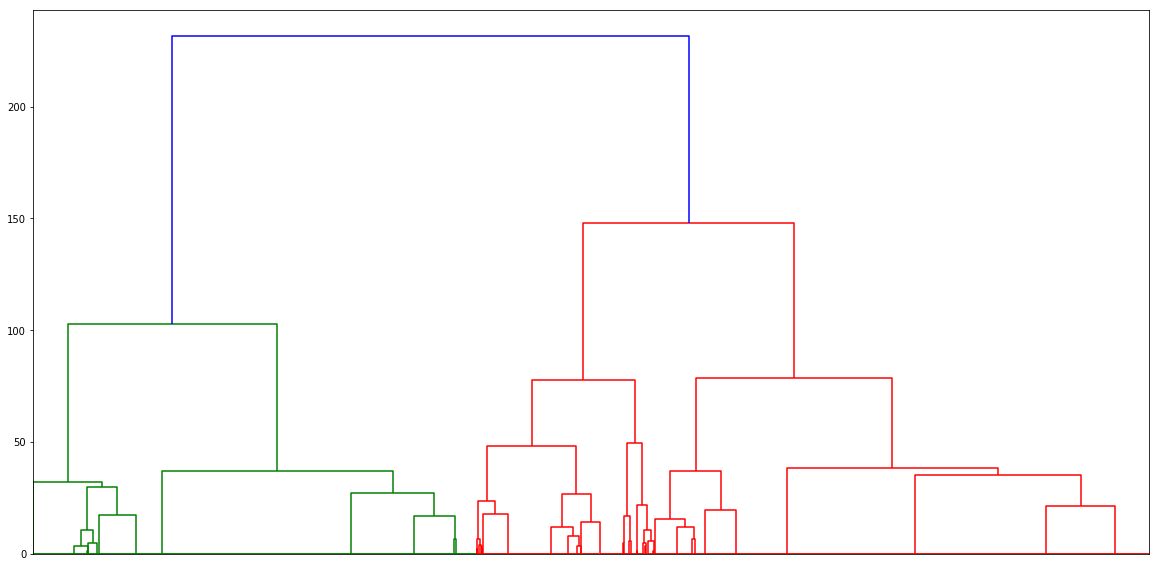

In [163]:
#As we can see, there does not seem to be any clear division between the classes.
#Lets move to unsupervised learning to see if we can find any pattern in the clusters.
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
import sys
sys.setrecursionlimit(15000)
x= df_new[['Title','Predicted_Salary']].as_matrix(columns=None)
z=linkage(x,'ward')
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1, 1, 1)
dendrogram(z,no_labels=True,ax=ax)
plt.show()
max_dist=110
clusters=fcluster(z,max_dist,criterion='distance')

In [164]:
#It shows a decent result with n=3 clusters. Lets see what kind of clusters we get here
df_roles['Labels6']=clusters

Exp_min
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff lower   upper  reject
--------------------------------------------
  1      2     1.6894  1.4027  1.976   True 
  1      3     0.8178  0.6062  1.0294  True 
  2      3    -0.8716  -1.154 -0.5892  True 
--------------------------------------------


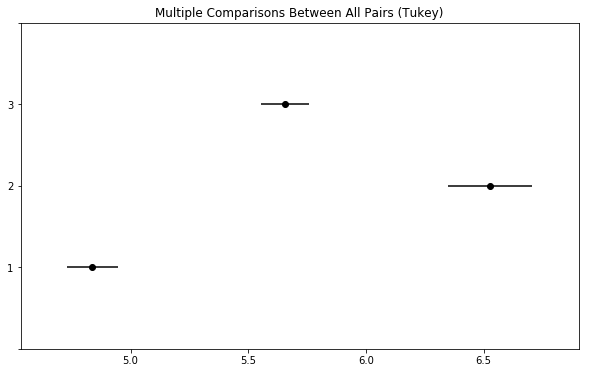

Exp_max
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2     1.9505   1.6254  2.2755  True 
  1      3     0.866    0.6261  1.1059  True 
  2      3    -1.0845  -1.4047 -0.7643  True 
---------------------------------------------


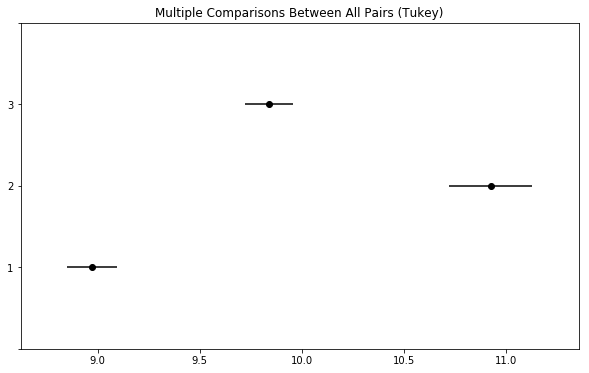

NCR
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2    -0.0845  -0.1229 -0.0461  True 
  1      3     0.0209  -0.0074  0.0493 False 
  2      3     0.1055   0.0677  0.1433  True 
---------------------------------------------


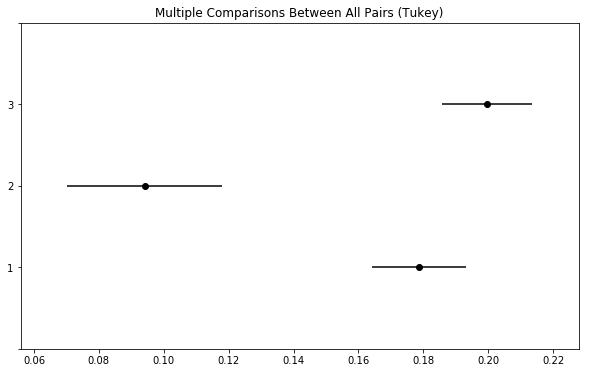

Hyd
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2    -0.0419  -0.0766 -0.0072  True 
  1      3     -0.023  -0.0487  0.0026 False 
  2      3     0.0189  -0.0154  0.0531 False 
---------------------------------------------


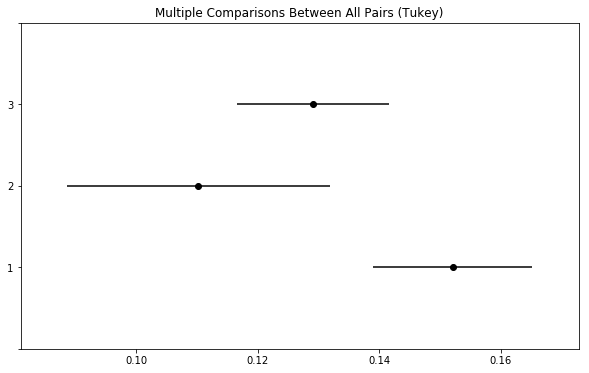

Pune
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2    -0.0822  -0.1135 -0.0509  True 
  1      3    -0.0037  -0.0268  0.0193 False 
  2      3     0.0785   0.0476  0.1093  True 
---------------------------------------------


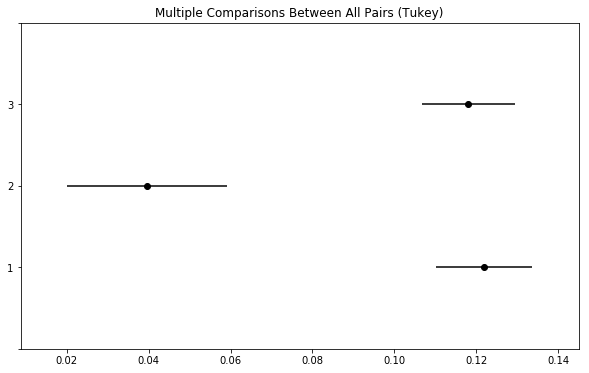

Mumbai
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2    -0.0824  -0.1171 -0.0476  True 
  1      3     0.0081  -0.0176  0.0337 False 
  2      3     0.0905   0.0562  0.1247  True 
---------------------------------------------


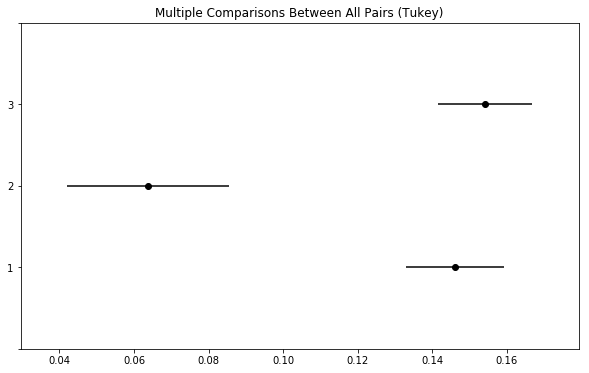

Bangalore
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2     0.4248   0.378  0.4717  True 
  1      3    -0.0303  -0.0649 0.0043 False 
  2      3    -0.4551  -0.5013 -0.409  True 
--------------------------------------------


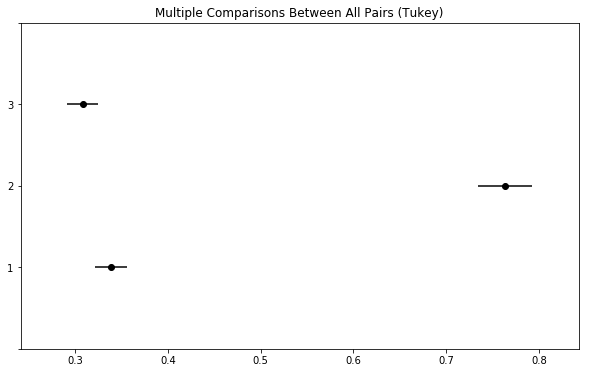

Chennai
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2    -0.0925  -0.1229 -0.0621  True 
  1      3     0.0024  -0.0201  0.0248 False 
  2      3     0.0949   0.0649  0.1249  True 
---------------------------------------------


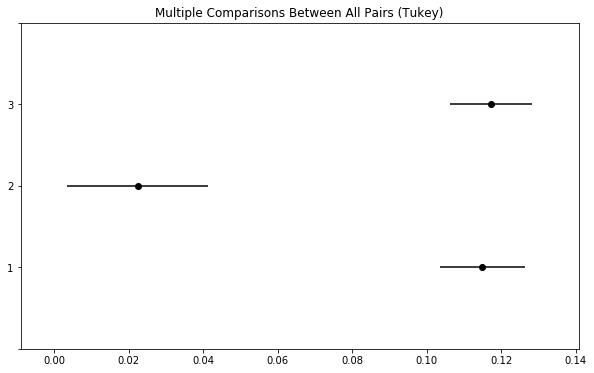

Ahmedabad
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2    -0.0147  -0.0262 -0.0032  True 
  1      3     0.0003  -0.0082  0.0088 False 
  2      3     0.015    0.0036  0.0263  True 
---------------------------------------------


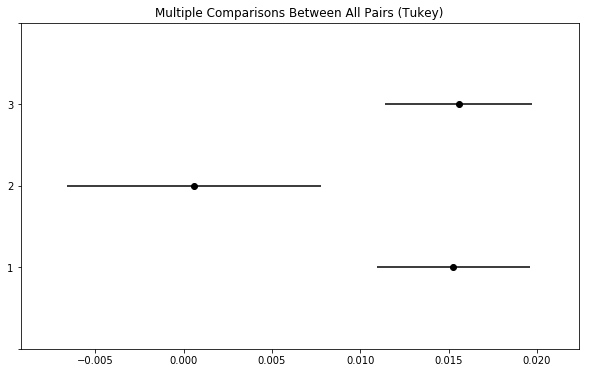

Kolkata
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2    -0.0101  -0.0211 0.001  False 
  1      3     0.0042   -0.004 0.0124 False 
  2      3     0.0143   0.0033 0.0252  True 
--------------------------------------------


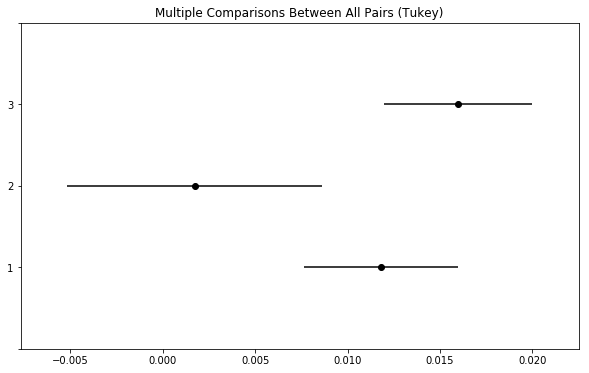

Kochi
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2    -0.0086  -0.0173 0.0002 False 
  1      3     0.0006  -0.0059 0.007  False 
  2      3     0.0091   0.0005 0.0177  True 
--------------------------------------------


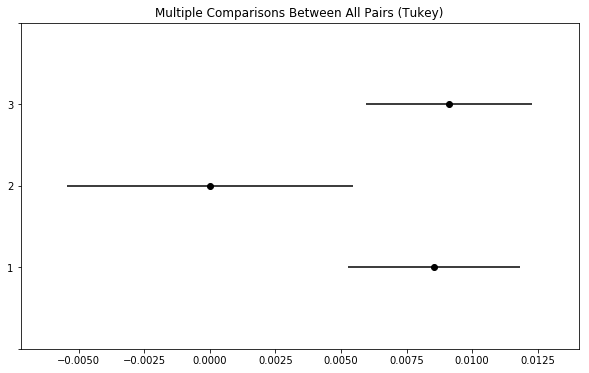

Jaipur
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2    -0.0034  -0.0101 0.0034 False 
  1      3    -0.0003  -0.0053 0.0047 False 
  2      3     0.0031  -0.0036 0.0097 False 
--------------------------------------------


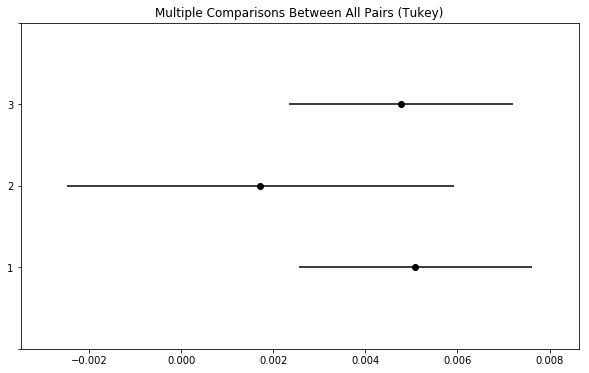

Trivandrum
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2    -0.0062  -0.0132 0.0008 False 
  1      3    -0.0011  -0.0062 0.0041 False 
  2      3     0.0052  -0.0017 0.0121 False 
--------------------------------------------


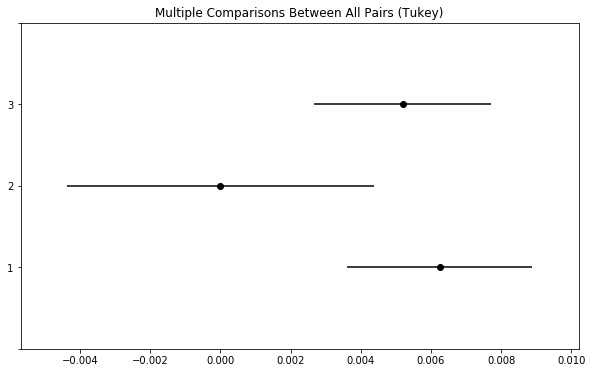

Indore
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2    -0.0079  -0.0143 -0.0014  True 
  1      3    -0.0058  -0.0105  -0.001  True 
  2      3     0.0021  -0.0043  0.0084 False 
---------------------------------------------


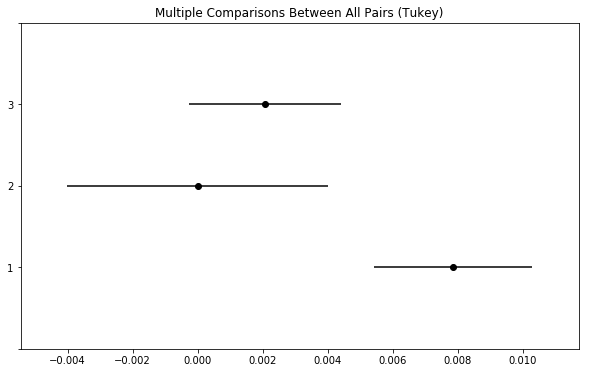

Coimbatore
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2    -0.0072  -0.0137 -0.0007  True 
  1      3    -0.0043  -0.0091  0.0005 False 
  2      3     0.0029  -0.0035  0.0093 False 
---------------------------------------------


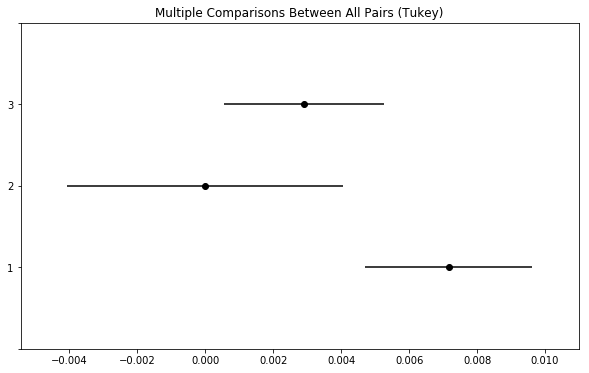

OthersLoc
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  1      2     -0.052  -0.0741 -0.03   True 
  1      3     0.0005  -0.0157 0.0168 False 
  2      3     0.0526   0.0309 0.0742  True 
--------------------------------------------


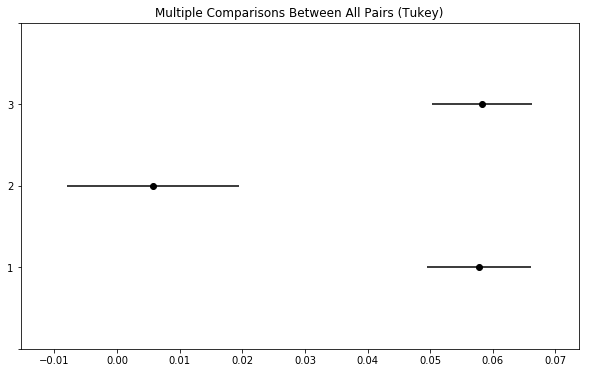

Dates_new
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2    -5.4525  -7.9428 -2.9622  True 
  1      3     2.0497   0.2117  3.8878  True 
  2      3     7.5023   5.0488  9.9557  True 
---------------------------------------------


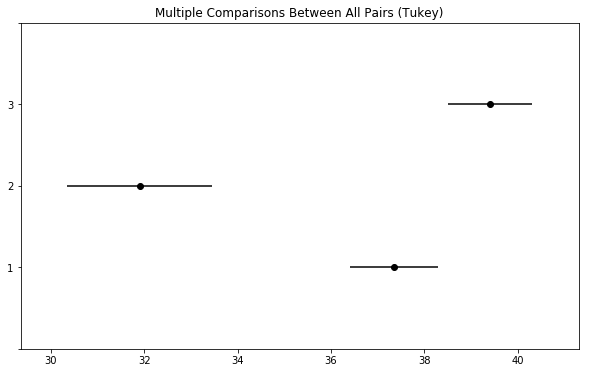

Exp_avg
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2     1.8199   1.521   2.1188  True 
  1      3     0.8419   0.6213  1.0625  True 
  2      3     -0.978  -1.2725 -0.6836  True 
---------------------------------------------


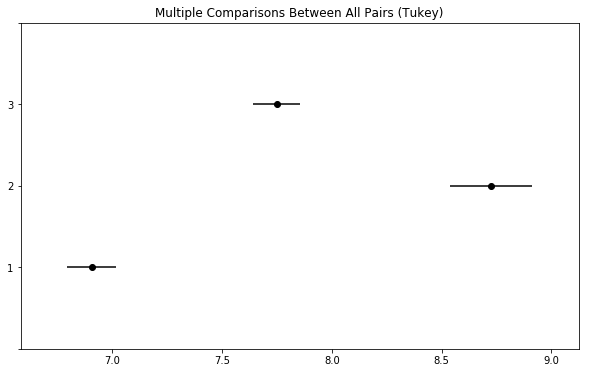

Predicted_Salary
Multiple Comparison of Means - Tukey HSD,FWER=0.00
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
  1      2     2.8004   2.7274  2.8734  True 
  1      3     0.1277   0.0738  0.1816  True 
  2      3    -2.6727  -2.7446 -2.6007  True 
---------------------------------------------


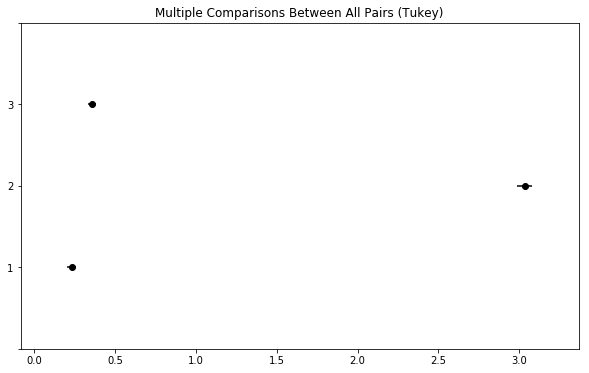

In [165]:
#6 Cluster model
Check=df_roles.drop(['Title','Skills_list','Title_new','Labels6','Labels3'],axis=1)
for col in Check.columns:
    mc1=multi.MultiComparison(Check[col],df_roles['Labels6'])
    res1=mc1.tukeyhsd(alpha=0.001)
    print col
    print res1.summary()
    res1.plot_simultaneous()
    plt.show()

In [166]:
#Testing for key skills differences
from collections import Counter
list1=[]
# list0=[]
list2=[]
list3=[]
# list4=[]
# list5=[]

for x in df_roles[df_roles['Labels6']==1]['Skills_list']:
    list1+=x
# for x in df_roles[df_roles['Labels6']==0]['Skills_list']:
#     list0+=x
for x in df_roles[df_roles['Labels6']==2]['Skills_list']:
    list2+=x
for x in df_roles[df_roles['Labels6']==3]['Skills_list']:
    list3+=x
# for x in df_roles[df_roles['Labels6']==4]['Skills_list']:
#     list4+=x
# for x in df_roles[df_roles['Labels6']==5]['Skills_list']:
#     list5+=x
for x in range(len(list1)):
    if 'SQL' in list1[x]:
        list1[x]='SQL'
    if 'Java' in list1[x]:
        list1[x]='Java'
    if 'HTML' in list1[x]:
        list1[x]='HTML'
# for x in range(len(list0)):
#     if 'SQL' in list0[x]:
#         list0[x]='SQL'
#     if 'Java' in list0[x]:
#         list0[x]='Java'
#     if 'HTML' in list0[x]:
#         list0[x]='HTML'
for x in range(len(list2)):
    if 'SQL' in list2[x]:
        list2[x]='SQL'
    if 'Java' in list2[x]:
        list2[x]='Java'
    if 'HTML' in list2[x]:
        list2[x]='HTML'
for x in range(len(list3)):
    if 'SQL' in list3[x]:
        list3[x]='SQL'
    if 'Java' in list3[x]:
        list3[x]='Java'
    if 'HTML' in list3[x]:
        list3[x]='HTML'
# for x in range(len(list4)):
#     if 'SQL' in list4[x]:
#         list4[x]='SQL'
#     if 'Java' in list4[x]:
#         list4[x]='Java'
#     if 'HTML' in list4[x]:
#         list4[x]='HTML'
# for x in range(len(list5)):
#     if 'SQL' in list5[x]:
#         list5[x]='SQL'
#     if 'Java' in list5[x]:
#         list5[x]='Java'
#     if 'HTML' in list5[x]:
#         list5[x]='HTML'
labels1, values1 = zip(*Counter(list1).items())
# labels0, values0 = zip(*Counter(list0).items())
labels2, values2 = zip(*Counter(list2).items())
labels3, values3 = zip(*Counter(list3).items())
# labels4, values4 = zip(*Counter(list4).items())
# labels5, values5 = zip(*Counter(list5).items())
sum1=float(np.sum(values1))
# sum0=float(np.sum(values0))
sum2=float(np.sum(values2))
sum3=float(np.sum(values3))
# sum4=float(np.sum(values4))
# sum5=float(np.sum(values5))
pd1=pd.DataFrame([labels0,values0],index=['Label','Values']).T.sort_values('Values',ascending=False)
pd1=pd1.drop(0)
pd1['Values_per']=pd1['Values']/(sum0)*100
print "Cluster 0"
print pd1.sort_values('Values_per',ascending=False).drop('Values',axis=1).head(10)
# print "--------------------------------"
# pd1=pd.DataFrame([labels1,values1],index=['Label','Values']).T.sort_values('Values',ascending=False)
# pd1=pd1.drop(0)
# pd1['Values_per']=pd1['Values']/(sum0)*100
# print "Cluster 1"
# print pd1.sort_values('Values_per',ascending=False).drop('Values',axis=1).head(10)
print "--------------------------------"
pd1=pd.DataFrame([labels2,values2],index=['Label','Values']).T.sort_values('Values',ascending=False)
pd1=pd1.drop(0)
pd1['Values_per']=pd1['Values']/(sum2)*100
print "Cluster 2"
print pd1.sort_values('Values_per',ascending=False).drop('Values',axis=1).head(10)
print "--------------------------------"
pd1=pd.DataFrame([labels3,values3],index=['Label','Values']).T.sort_values('Values',ascending=False)
pd1=pd1.drop(0)
pd1['Values_per']=pd1['Values']/(sum3)*100
print "Cluster 3"
print pd1.sort_values('Values_per',ascending=False).drop('Values',axis=1).head(10)
print "--------------------------------"
# pd1=pd.DataFrame([labels4,values4],index=['Label','Values']).T.sort_values('Values',ascending=False)
# pd1=pd1.drop(0)
# pd1['Values_per']=pd1['Values']/(sum4)*100
# print "Cluster 4"
# print pd1.sort_values('Values_per',ascending=False).drop('Values',axis=1).head(10)
# print "--------------------------------"
# pd1=pd.DataFrame([labels5,values5],index=['Label','Values']).T.sort_values('Values',ascending=False)
# pd1=pd1.drop(0)
# pd1['Values_per']=pd1['Values']/(sum5)*100
# print "Cluster 5"
# print pd1.sort_values('Values_per',ascending=False).drop('Values',axis=1).head(10)
# print "--------------------------------"

Cluster 0
                 Label Values_per
2157               SQL    8.09694
1514              Java    4.75296
1227            Python    3.14672
75          Algorithms    1.73774
1681              HTML    1.63442
527              Linux    1.11779
766             Oracle    1.08961
545    Data structures   0.826602
658                C++   0.817208
317                  C   0.798422
--------------------------------
Cluster 2
                 Label Values_per
2267               SQL    7.82988
1676              Java    4.37275
1357            Python    2.93514
91          Algorithms    1.72856
1845              HTML    1.48896
576              Linux    1.20657
838             Oracle    1.06966
595    Data structures   0.864282
351                  C   0.761595
1760               XML   0.753038
--------------------------------
Cluster 3
            Label Values_per
4591          SQL    8.08016
3394         Java    3.46885
2723       Python    2.81785
3724         HTML    2.01366
1694       

In [167]:
df_roles.to_csv("data_new.csv")